<a href="https://colab.research.google.com/github/andresRah/keepcoding-despliegue/blob/main/Andres_Arevalo_masterclass_despliegue_practica_sinsol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir:

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

### 1) Importar Librerias necesarias e Instalar MLFlow

In [ ]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
# Importar Librerias Necesarias
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns


### 2) Exploración y Análisis de Datos

In [ ]:
# Cargar el dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [ ]:
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [ ]:
# Análisis y Exploración de Datos
X.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [ ]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

### 3) Visualización de los datos

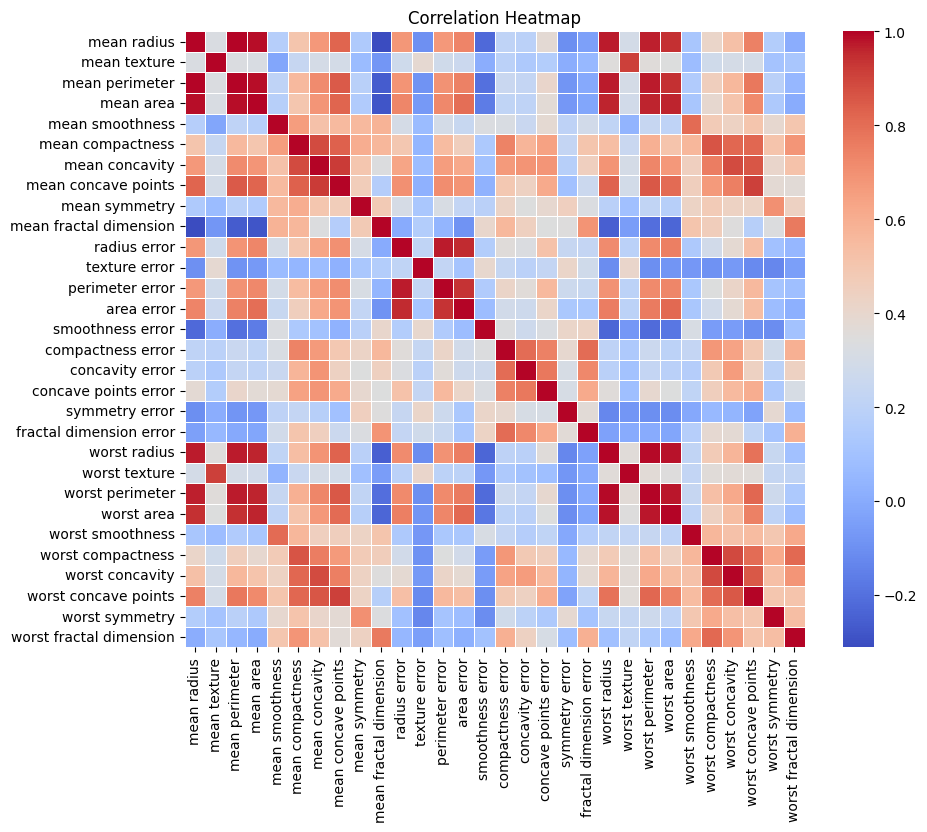

In [ ]:
# Visualización de los datos
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 4) División del conjunto de datos en Train y Test

In [ ]:
# División del conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5) Estandarización de los datos

In [ ]:
# Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6) Entrenamiento del modelo XGBoost

In [ ]:
# Entrenamiento del modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### 7) Validación del modelo

In [ ]:
# Validación del modelo
y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy_train = model.score(X_train, y_train)
score = model.score(X_test, y_test)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Score: {score}")
print(f"Accuracy Train: {accuracy_train}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.956140350877193
Score: 0.37719298245614036
Accuracy Train: 0.37142857142857144
Confusion Matrix:
[[40  3]
 [ 2 69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## 8) Despliegue

### 8.1) Configuración de NGrok y MlFlow

In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

In [ ]:
ngrok.kill()

In [ ]:
NGROK_AUTH_TOKEN = "25sfskznGKuJywbqdoFJWatGmsr_4xPLNXKwMcPX1aRnCzK1o"

In [ ]:
mlflow.set_experiment('Cancer Classifier with Accuracy')

with mlflow.start_run(run_name='Despliegue de Algoritmo XGBoost'):
  mlflow.log_param('n_estimators', 100)
  mlflow.log_metric('accuracy', accuracy)
  mlflow.log_metric('score', score)
  mlflow.log_metric('accuracy_train', accuracy_train)

get_ipython().system_raw('mlflow ui --port 5000 &')

ngrok.kill()

ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls=True)
print('El tracking UI:', ngrok_tunnel.public_url)

2024/07/13 04:12:26 INFO mlflow.tracking.fluent: Experiment with name 'Cancer Classifier with Accuracy' does not exist. Creating a new experiment.


El tracking UI: https://624b-34-91-176-176.ngrok-free.app


## 8.2) Interfaz de MLFlow

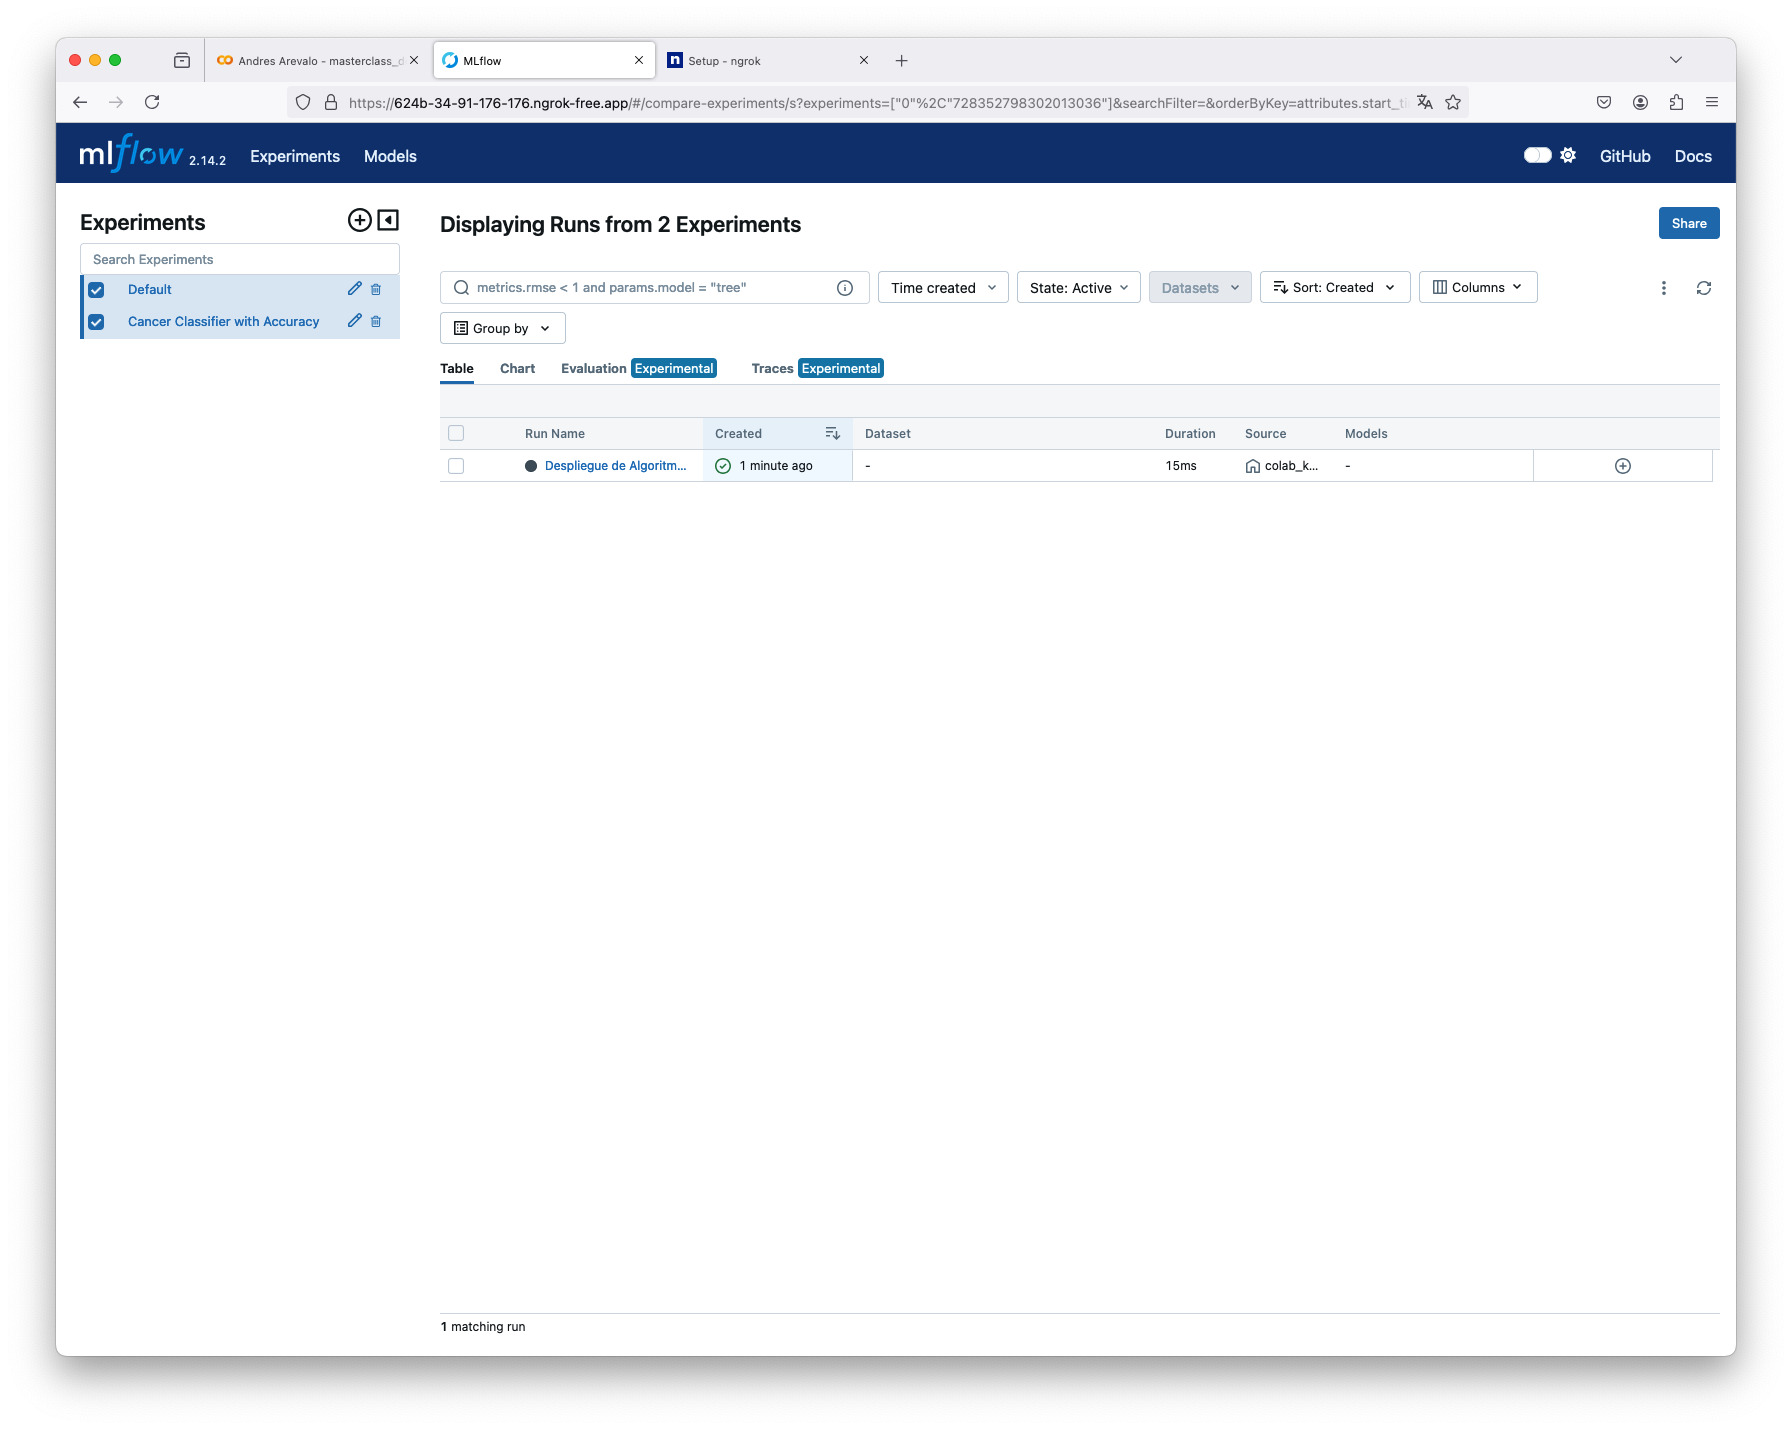

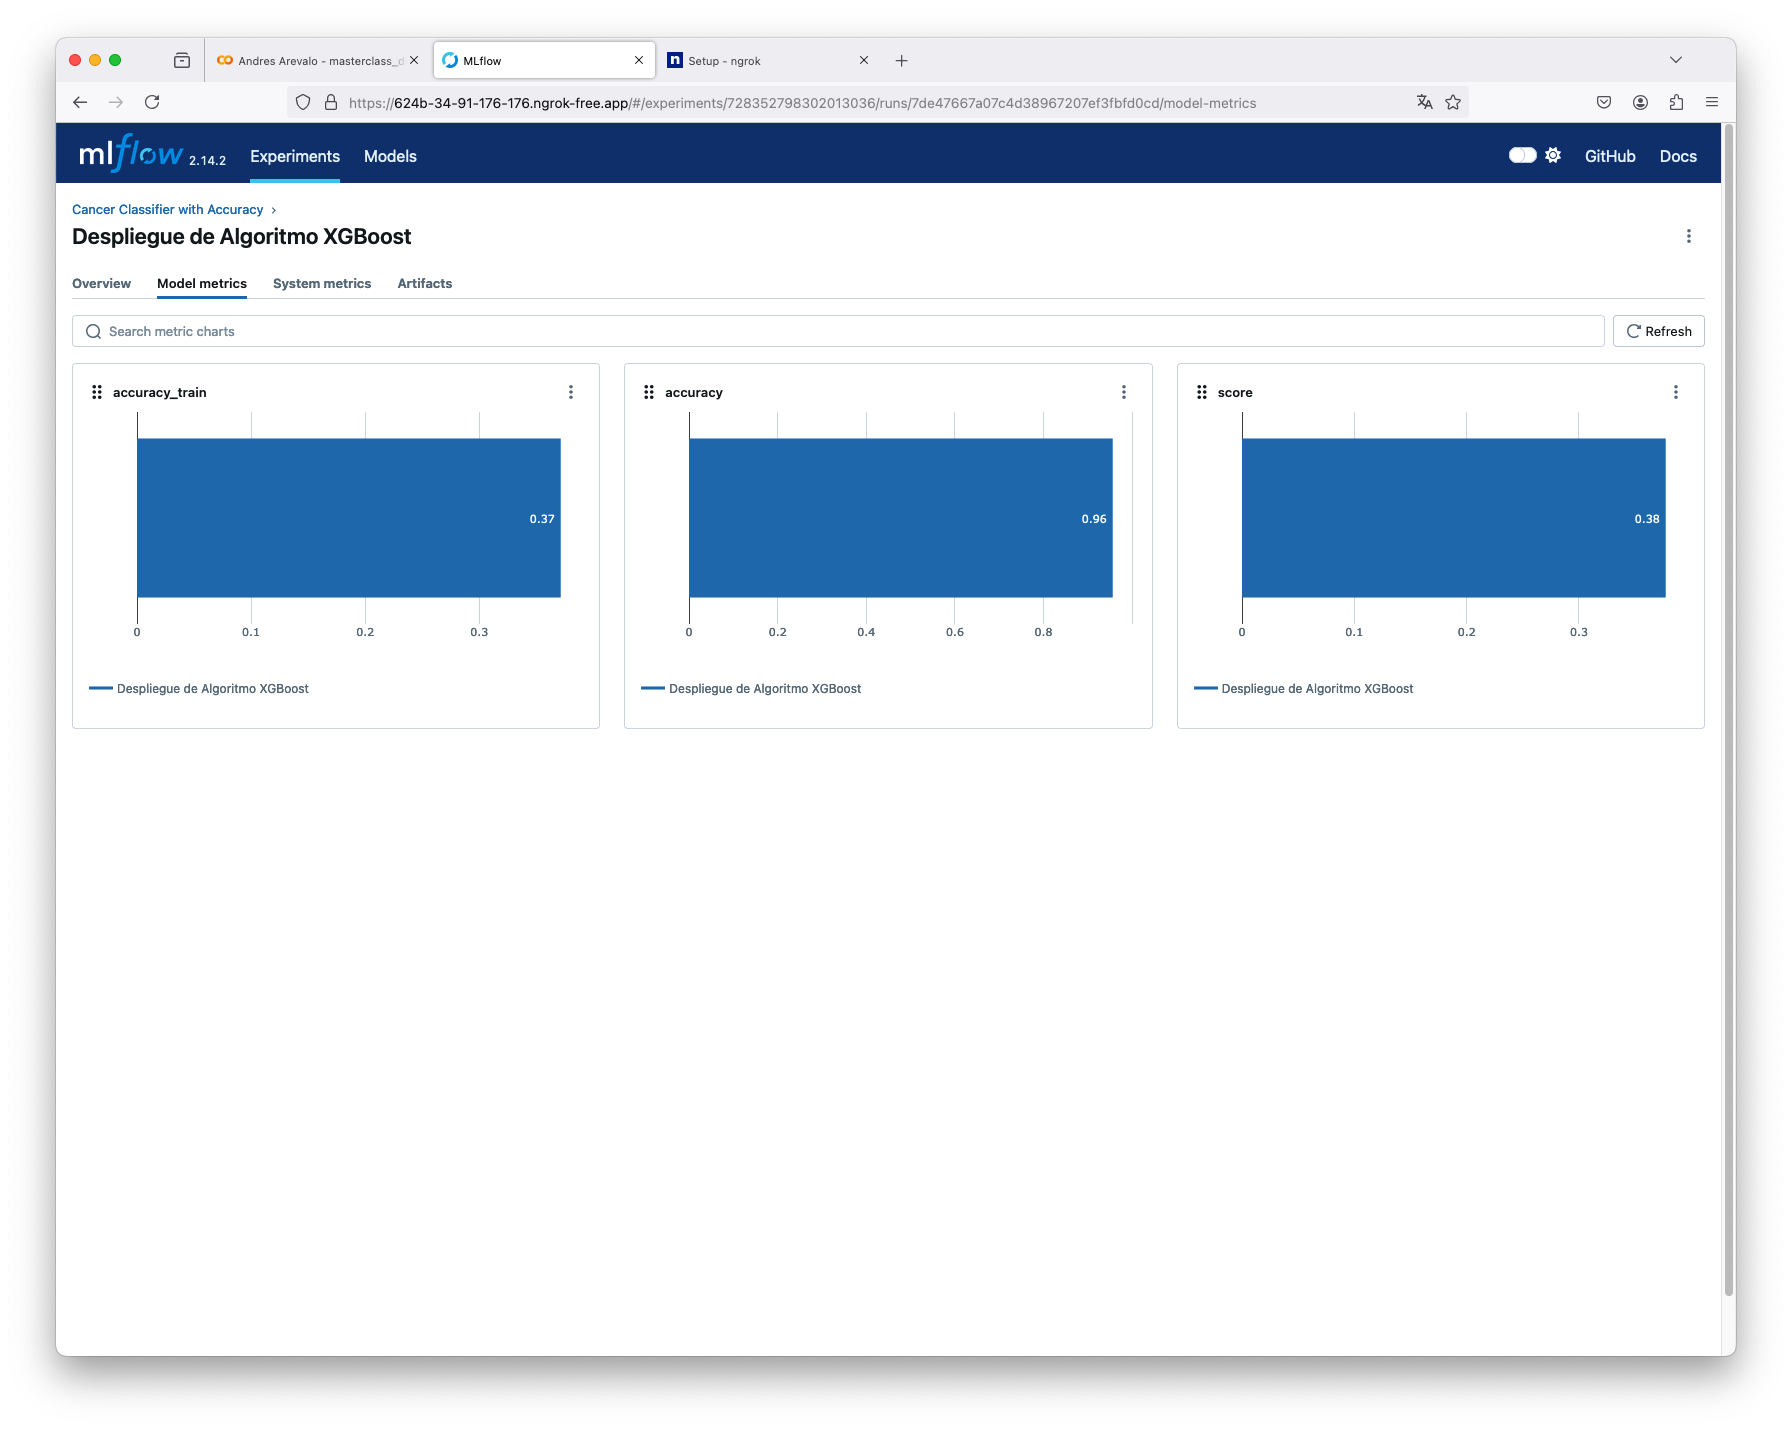

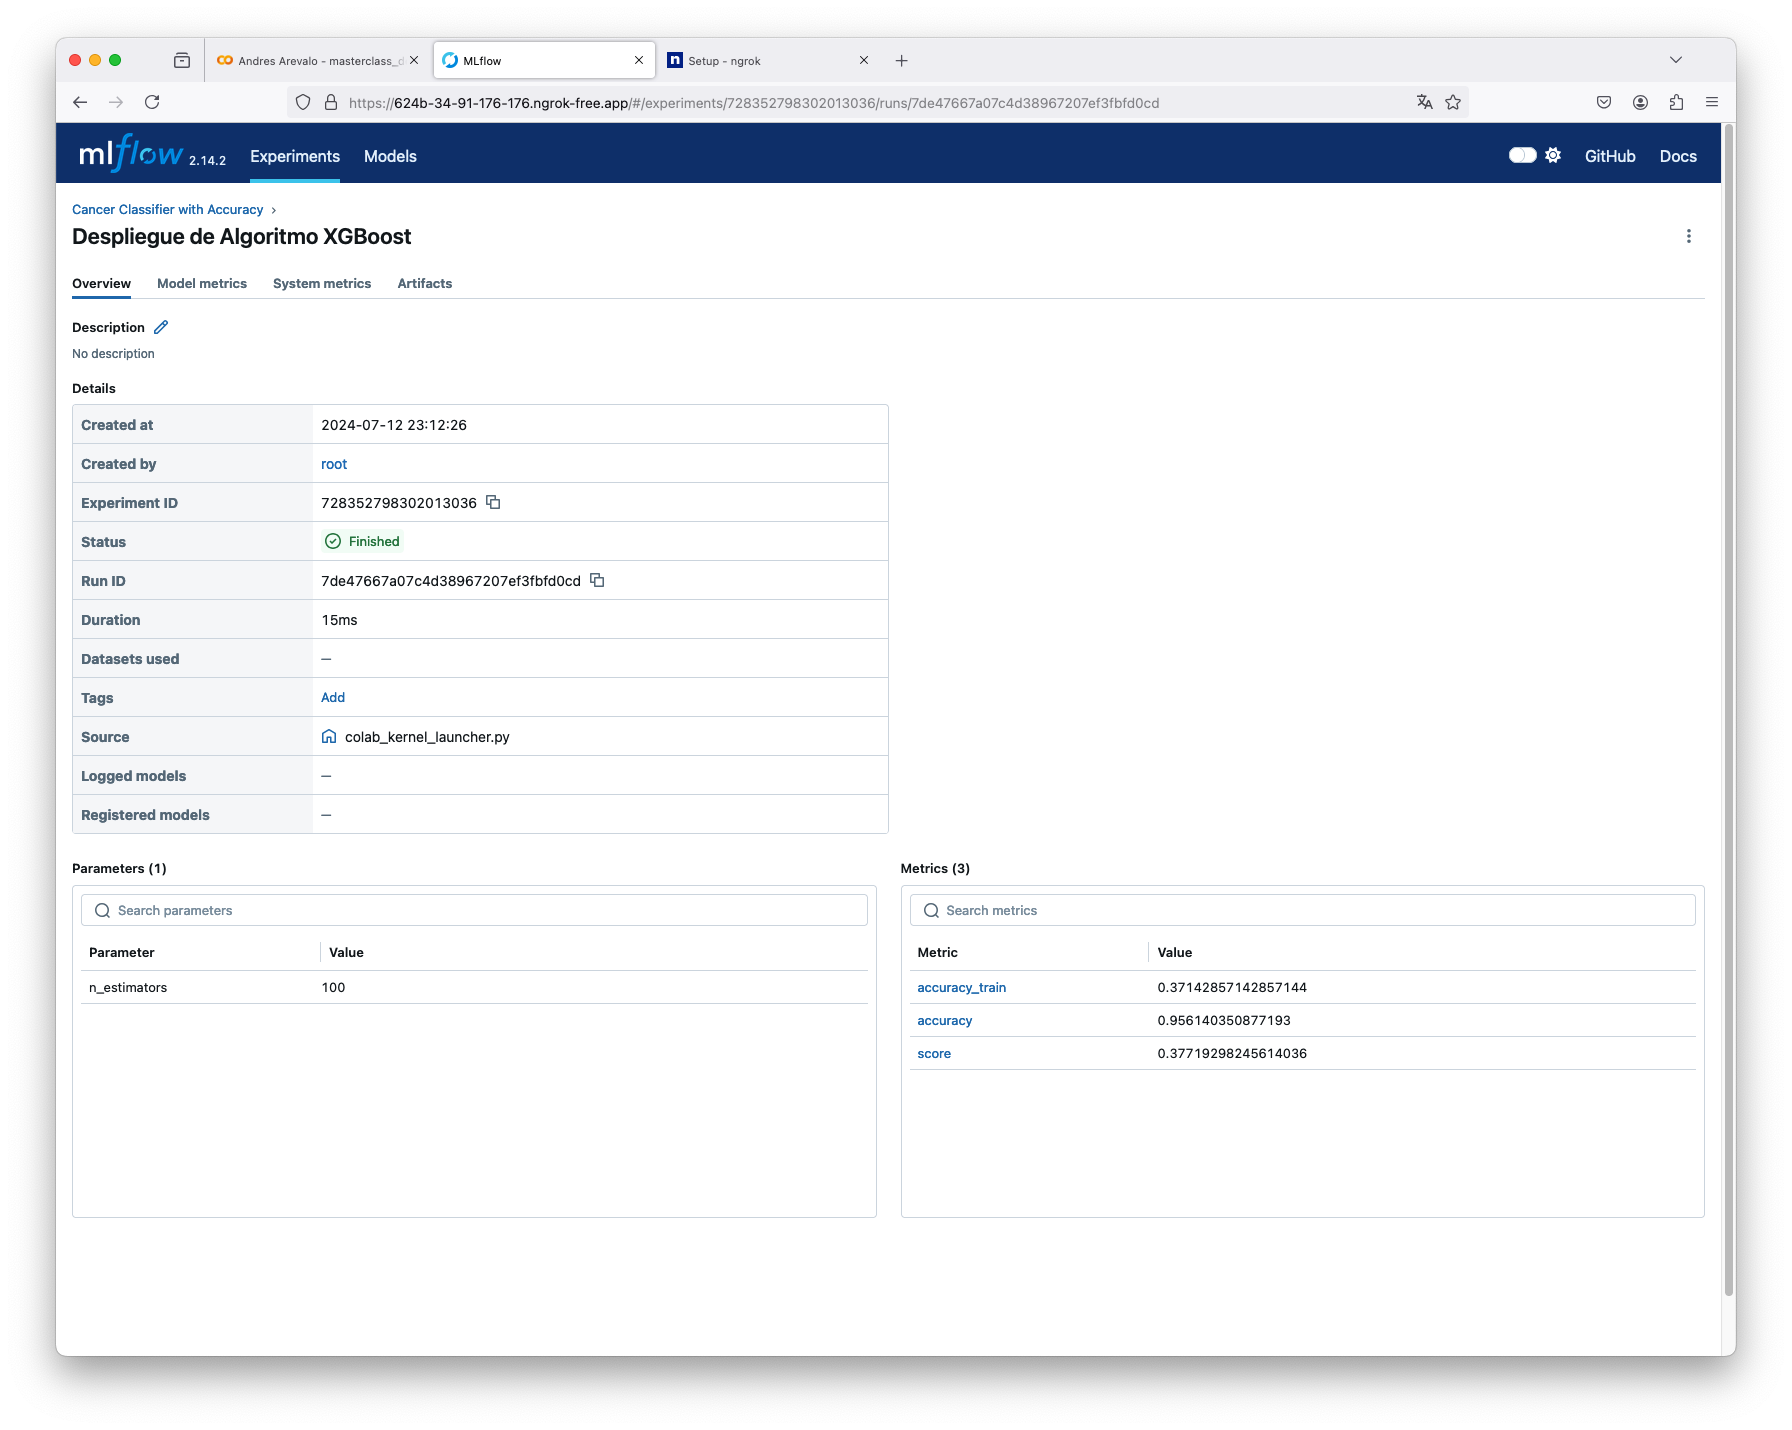

## Generar .py de funciones y main con al menos dos argumentos de entrada.

In [ ]:
# funciones.py
%%writefile funciones.py
import argparse
import subprocess
import time
import mlflow
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

def read_args():
  parser = argparse.ArgumentParser()
  parser.add_argument('--nombre_job', type=str, default='Pruebas')
  parser.add_argument('--n_estimators', type=int, default=100)
  parser.add_argument('--max_depth', type=int, default=None)
  args = parser.parse_args()
  return args

def load_dataset(feature_names=None):
  data = load_breast_cancer()
  if feature_names is None:
    feature_names = data.feature_names
  X = pd.DataFrame(data.data, columns=data.feature_names)
  y = pd.Series(data.target, name='target')
  return X, y

def data_treatment(X, y):
  # División del conjunto de datos en train y test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  return X_train_scaled, X_test_scaled, y_train, y_test

def model_selection(X_train, X_test, y_train, y_test, n_estimators, max_depth):
  model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(n_estimators=n_estimators, max_depth=max_depth))
  ])
  model.fit(X_train, y_train)
  return model

def mlflow_tracking(nombre_job, n_estimators, max_depth):
  with mlflow.start_run(run_name=nombre_job) as run:
    X, y = load_dataset()
    X_train, X_test, y_train, y_test = data_treatment(X, y)
    model = model_selection(X_train, X_test, y_train, y_test, n_estimators, max_depth)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_metric("accuracy", model.score(X_test, y_test))
    mlflow.sklearn.log_model(model, 'clf-model')
    print("Modelo registrado en MLFlow")
    time.sleep(5)
    mlflow.end_run()
    print("Run finalizado")

Overwriting funciones.py


In [ ]:
# main.py
%%writefile main.py
from funciones import read_args, load_dataset, mlflow_tracking

def main():
  args = read_args()
  mlflow_tracking(args.nombre_job, args.n_estimators, args.max_depth)
  print("Ejecución Finalizada")

if __name__ == "__main__":
  main()

Overwriting main.py


In [ ]:
!python3 main.py \
  --nombre_job "Pruebas XGBClassifier" \
  --n_estimators 50 \
  --max_depth 3

Modelo registrado en MLFlow
Run finalizado
Ejecución Finalizada


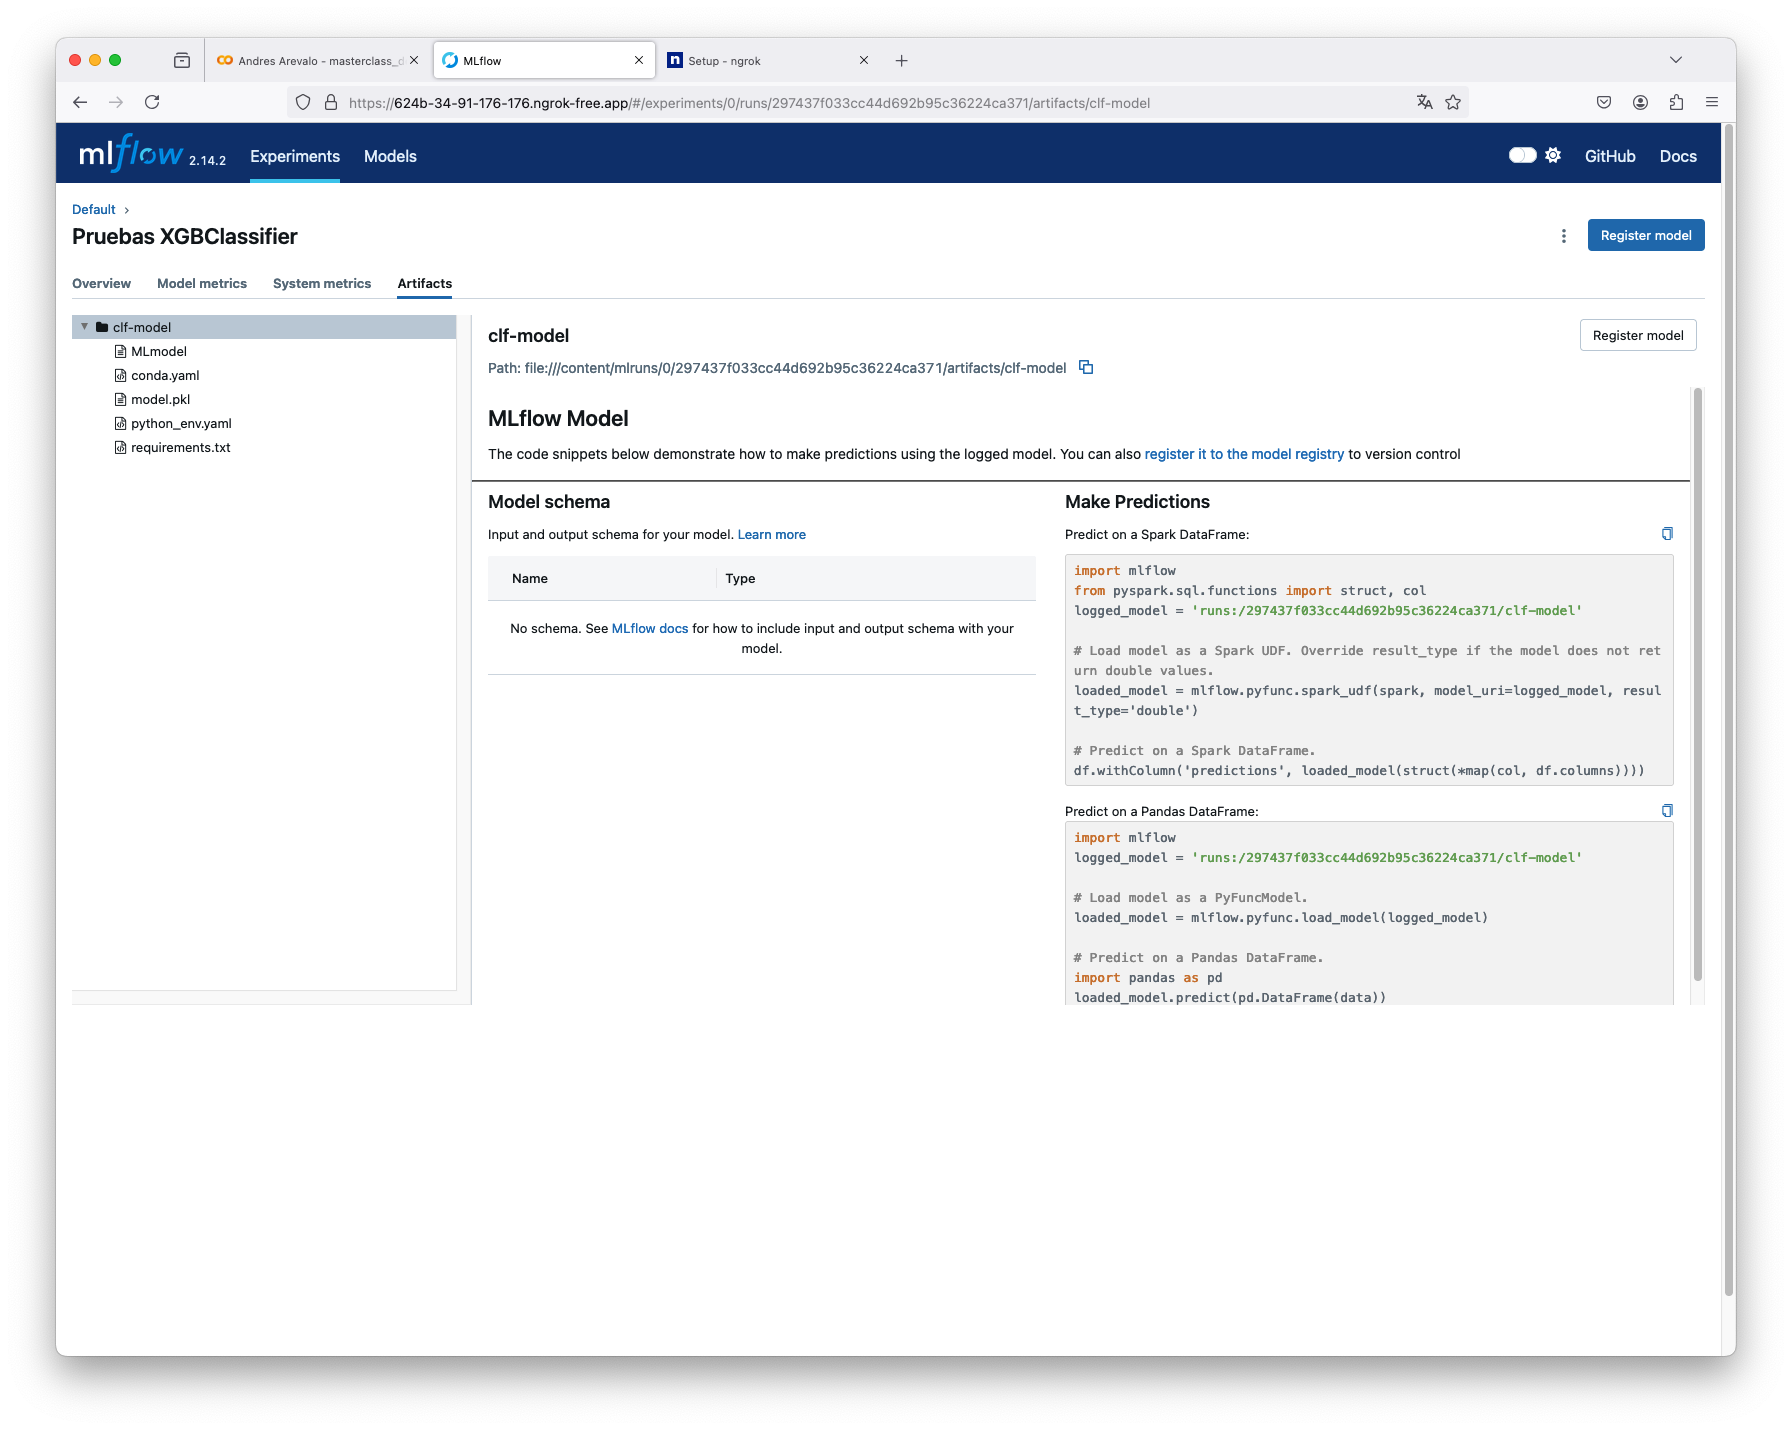

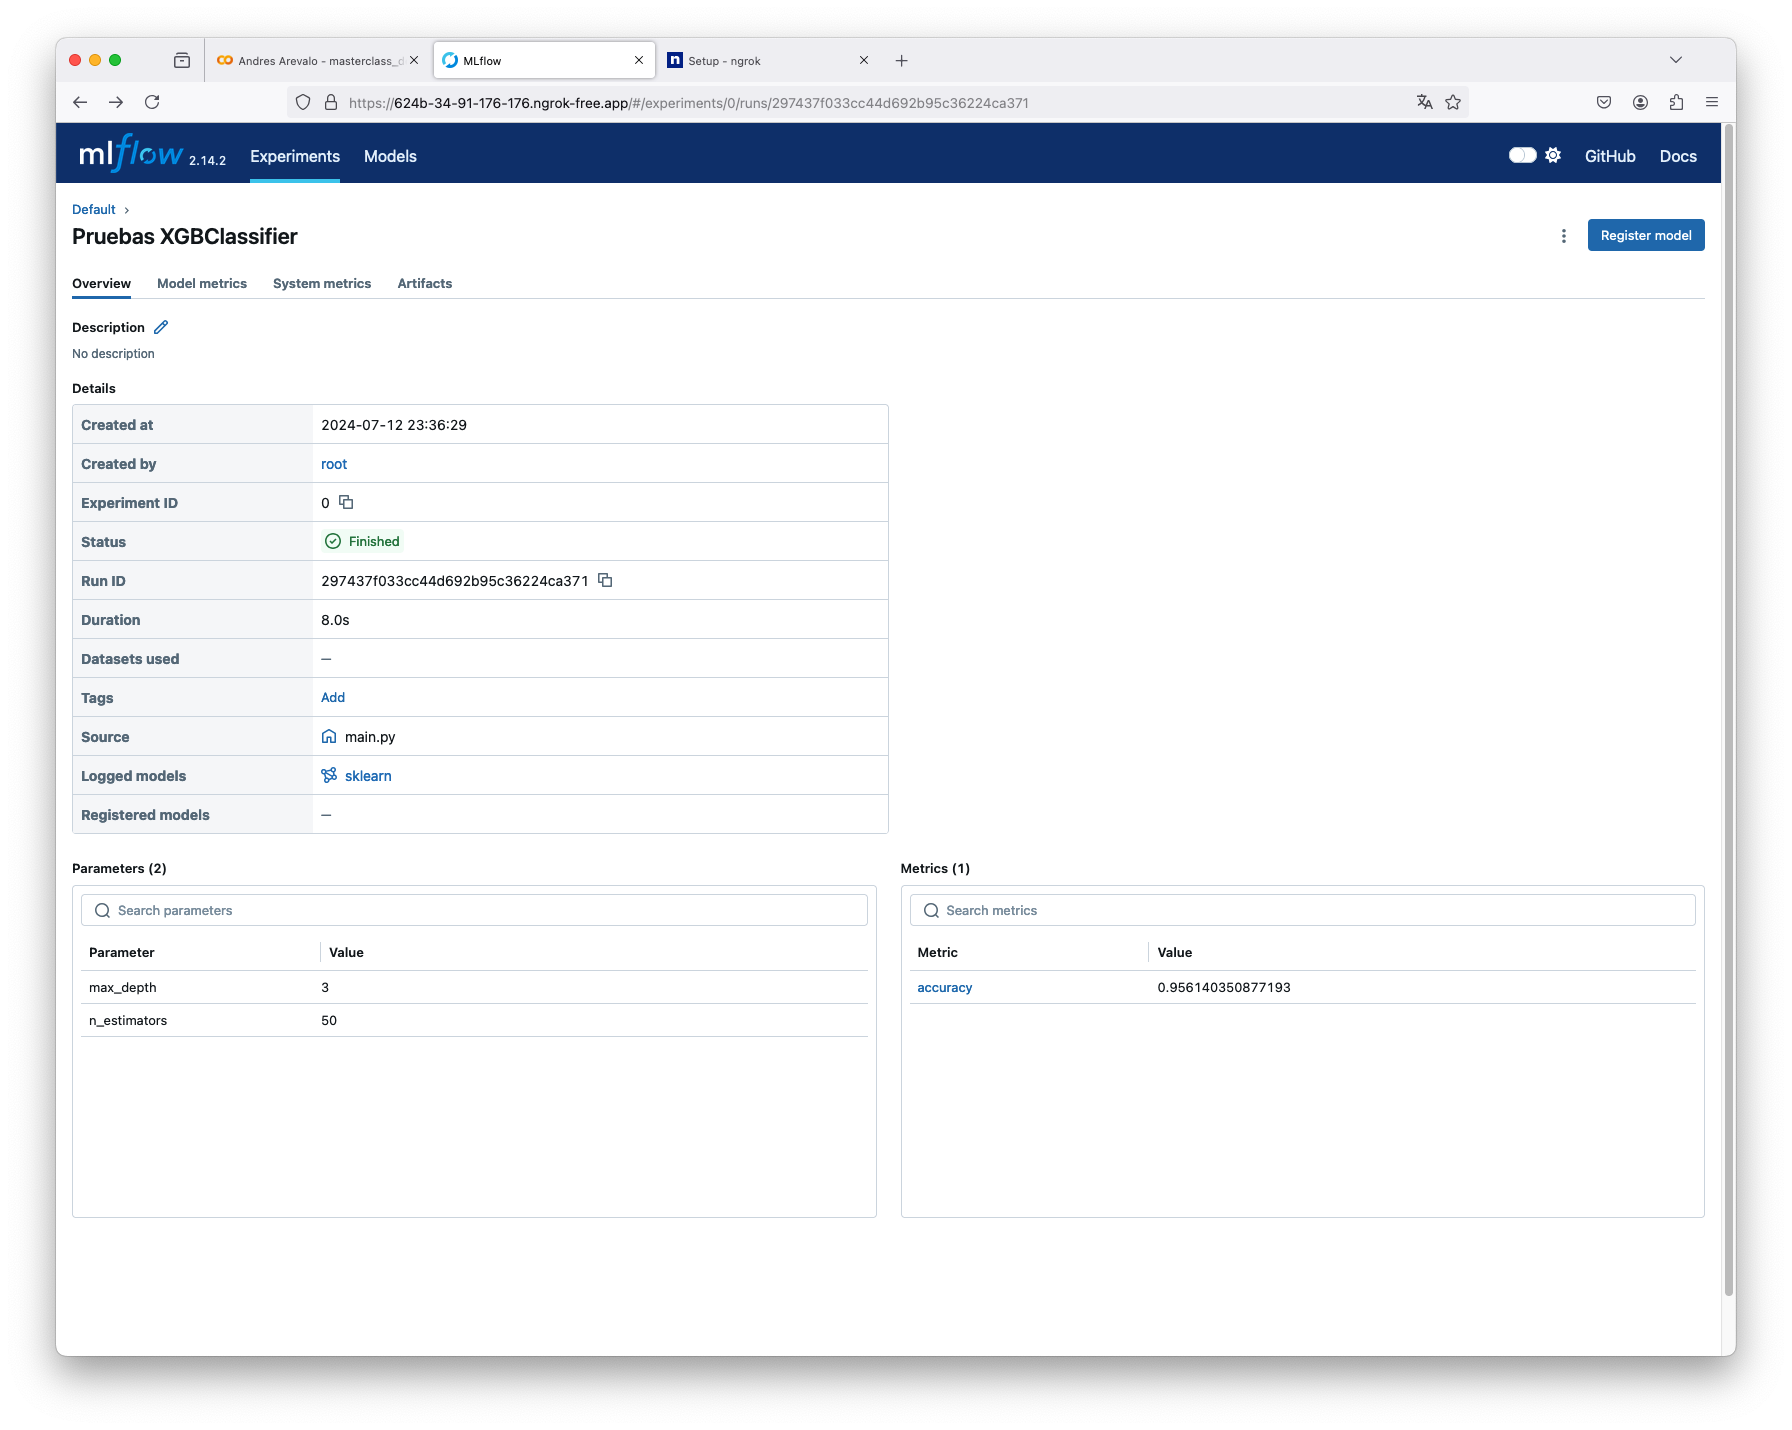

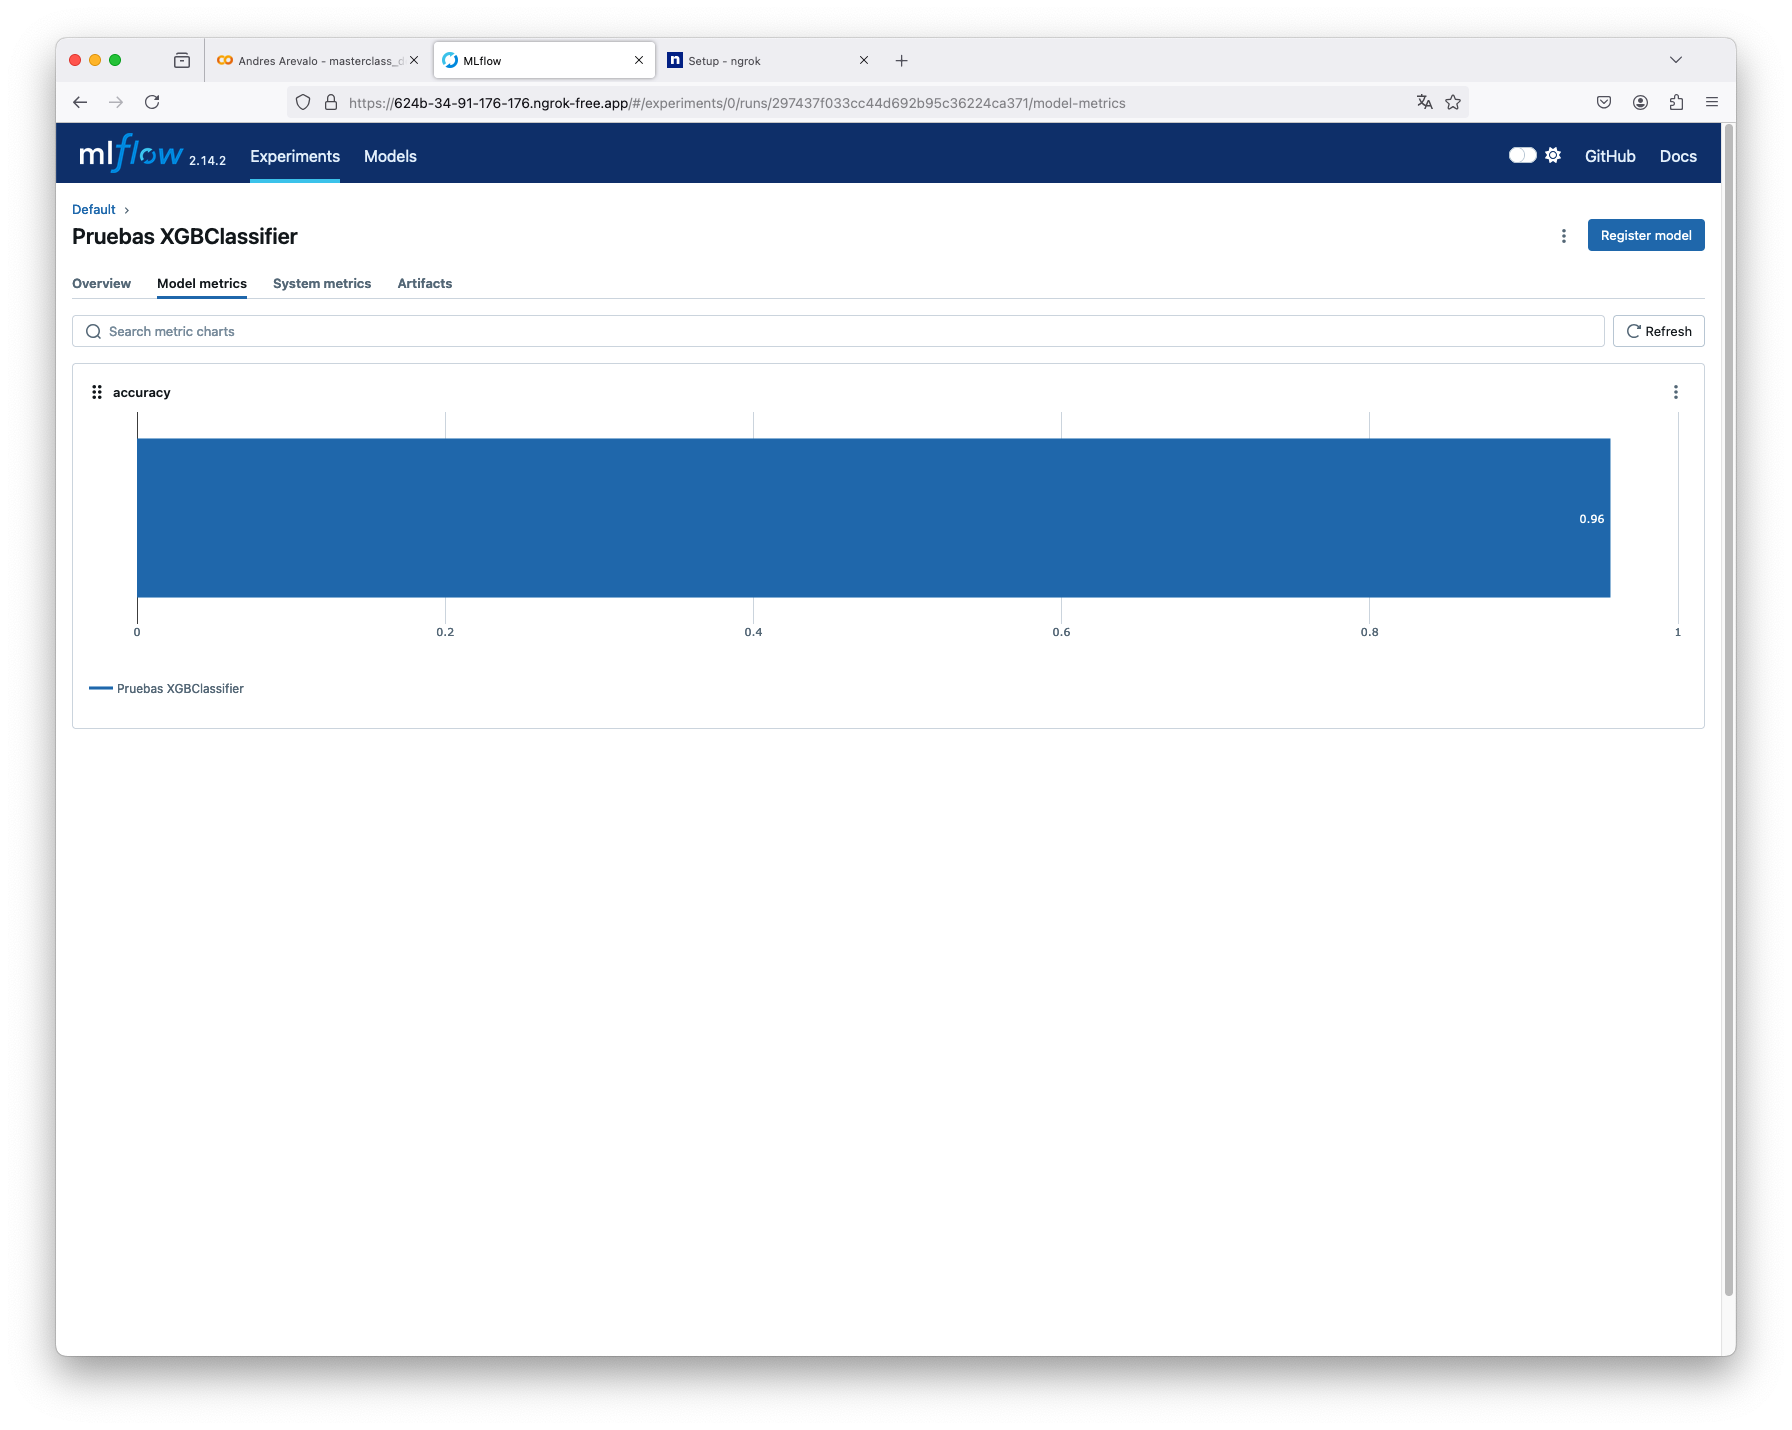

## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF.

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes.

### 1. Captura de la pantalla docs con al menos 5 modulos.
### 2. Captura de cada una de los modulos con la respuesta dentro de docs.
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run

In [ ]:
!pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install pydantic

In [ ]:
pip install transformers

In [ ]:
%%writefile services.py
from fastapi import FastAPI
from pydantic import BaseModel
from transformers import pipeline
from typing import Optional
import pandas as pd
import random

class User(BaseModel):
    name: str
    surname: Optional[str] = None

class Tweet(BaseModel):
    text: str

app = FastAPI()

# Simulated DataFrame
df = pd.DataFrame({
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6]
})

@app.get('/data/{position}')
def get_(position: int):
    value = df['sepal_length'][position]
    return {'Value': value}

@app.post('/hello')
def testing(user: User):
    if user.surname is None:
        message = f'Bienvenido a la API! Tu nombre es {user.name}'
    else:
        message = f'Bienvenido! Tu nombre es {user.name} y tu apellido {user.surname}'
    return {'message': message}

@app.post('/classify_tweet')
def classify_tweet(tweet: Tweet):
    sentiment_pipeline = pipeline('sentiment-analysis')
    sentiment = sentiment_pipeline(tweet.text)[0]['label']
    return {'Sentiment': sentiment}

@app.post('/generate_bitcoin_tweet')
def generate_bitcoin_tweet(tweet: Tweet):
    text_generation_pipeline = pipeline("text-generation", model="huggingtweets/bitcoin")
    generated_tweets = text_generation_pipeline(tweet.text, num_return_sequences=5)
    return {'Generated_Tweets': [t['generated_text'] for t in generated_tweets]}

@app.get('/random_phrase')
def random_phrase():
    phrases = [
        "La vida es un sueño, y los sueños, sueños son.",
        "El que busca, encuentra.",
        "Más vale tarde que nunca.",
        "A quien madruga, Dios le ayuda.",
        "No hay mal que por bien no venga."
    ]
    selected_phrase = random.choice(phrases)
    return {'Random_Phrase': selected_phrase}

Overwriting services.py


In [ ]:
ngrok.kill()

In [ ]:
import nest_asyncio
from pyngrok import ngrok, conf

conf.get_default().auth_token = NGROK_AUTH_TOKEN
ngrok.kill()
ngrok_tunell = ngrok.connect(8000)
print('Este es el URL,',ngrok_tunell.public_url)

NGROK_URL = ngrok_tunell.public_url

nest_asyncio.apply()


Este es el URL, https://79ae-34-75-140-168.ngrok-free.app


In [ ]:
! uvicorn services:app --port 8000

2024-07-14 06:09:34.322037: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 06:09:34.322109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 06:09:34.324980: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-14 06:09:34.339216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-14 06:09:36.658624: W tensorflow/compiler/tf2

## Prueba de los modelos de HuggingFace

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="soleimanian/financial-roberta-large-sentiment")

config.json:   0%|          | 0.00/936 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
print(pipe("In fiscal 2021, we generated a net yield of approximately 4.19% on our investments, compared to approximately 5.10% in fiscal 2020."))

[{'label': 'negative', 'score': 0.998661994934082}]


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="huggingtweets/bitcoin")

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

In [ ]:
result = pipe("My dream is", num_return_sequences=5)
print(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "My dream is to become a native of India. That's what my grandparents wanted for 40 years, and I can't wait to move to India for them!"}, {'generated_text': 'My dream is to take on the @TAPlus_Network when I build a scalable #Bitcoin network that will be peer to peer. 👍💻 🚀️🖨'}, {'generated_text': 'My dream is that one day when most people can put down the phone and look at their cell phones, and they will not be afraid to go in and steal their money.'}, {'generated_text': 'My dream is to make a functional cryptocurrency.'}, {'generated_text': 'My dream is to become the next #BitcoinCash, and I want to use the platform as an opportunity to share my vision and skills with the community. Thanks @jmatthews @rogerkver'}]


1. Captura de la pantalla docs con al menos 5 modulos.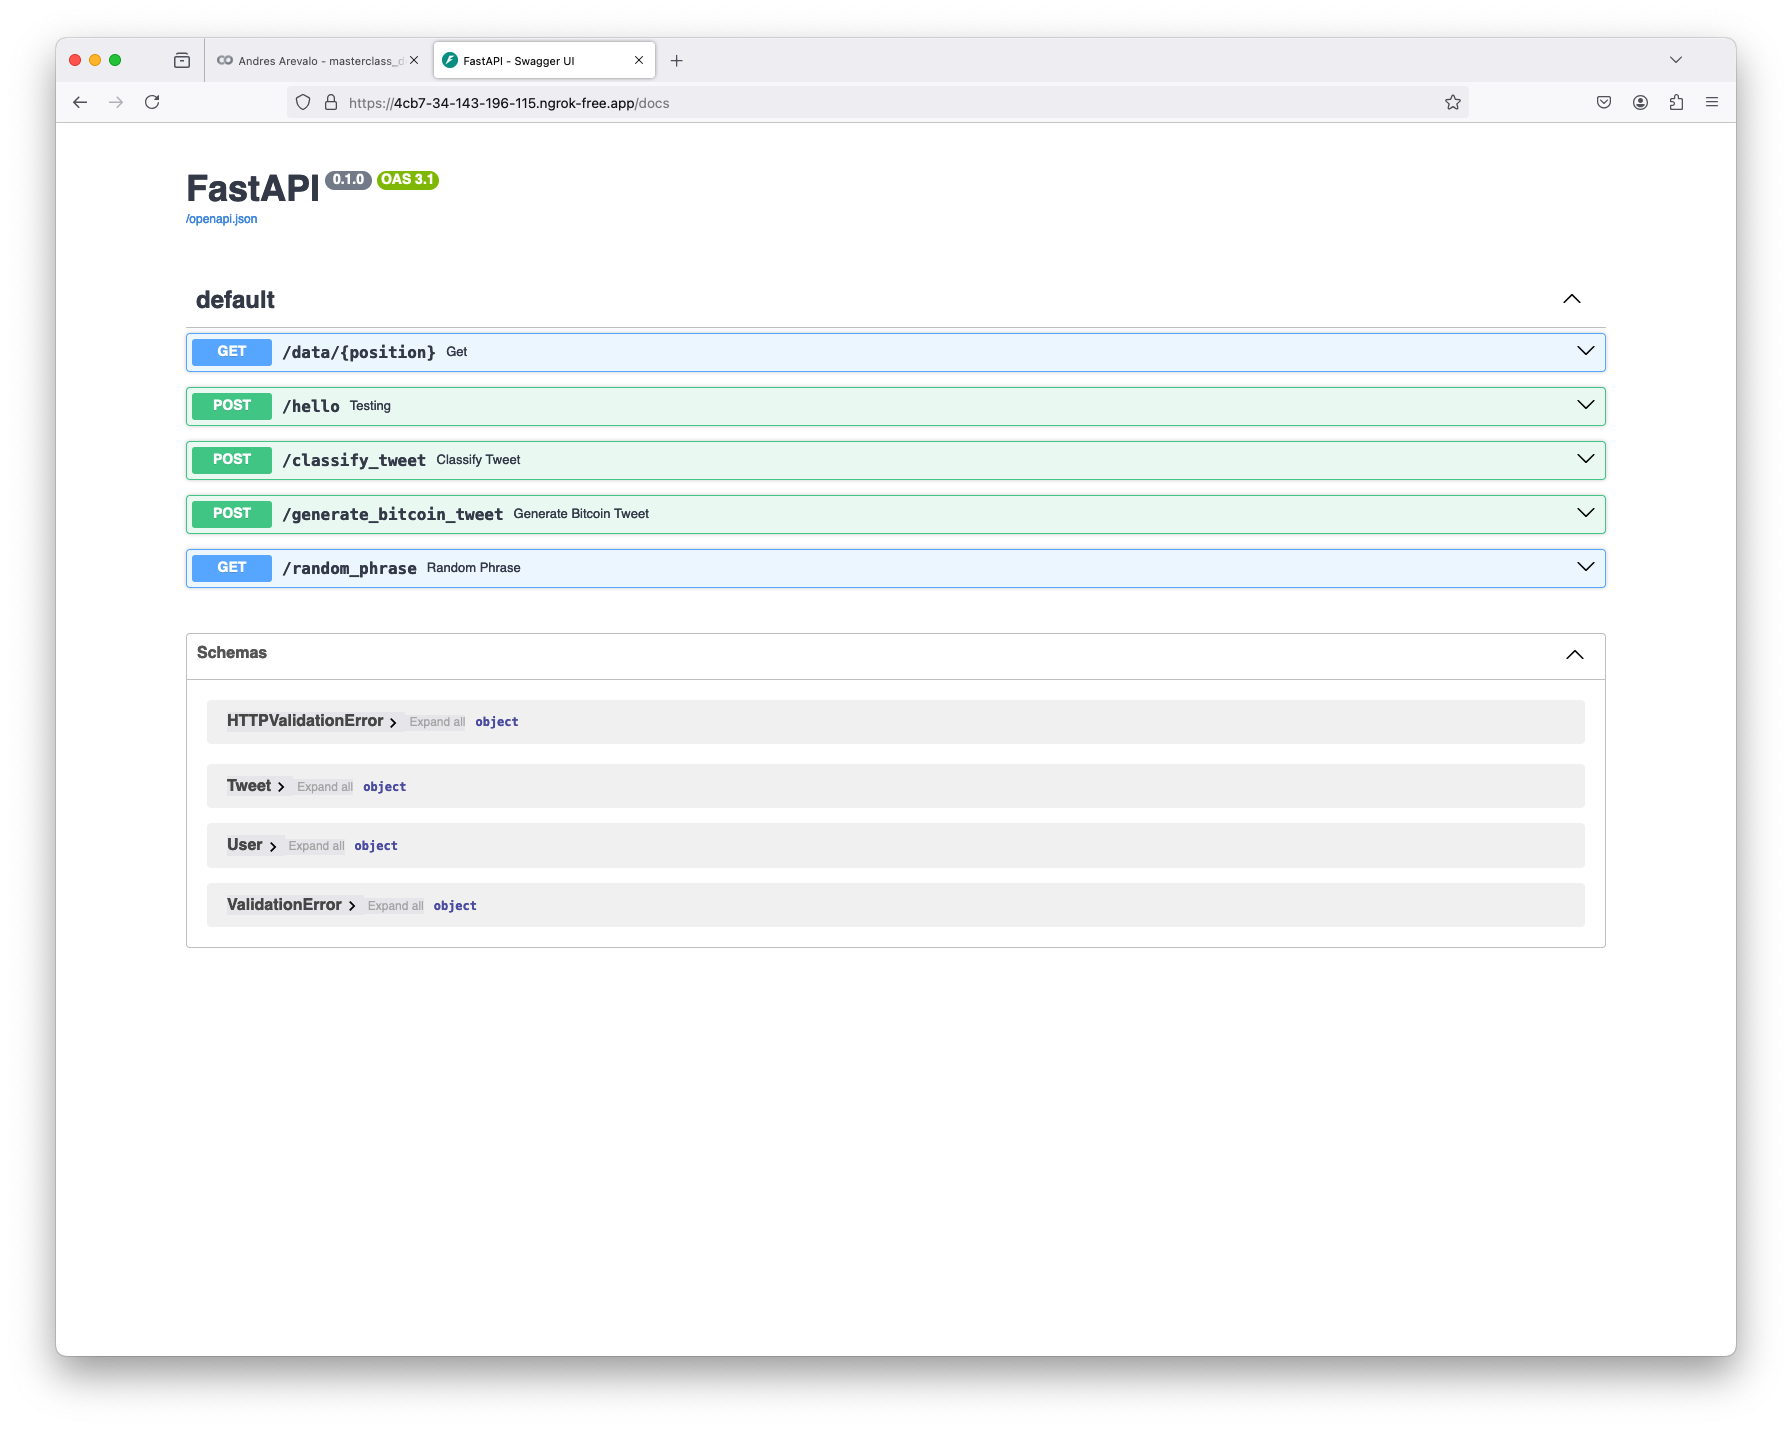

2. Captura de cada una de los modulos con la respuesta dentro de docs.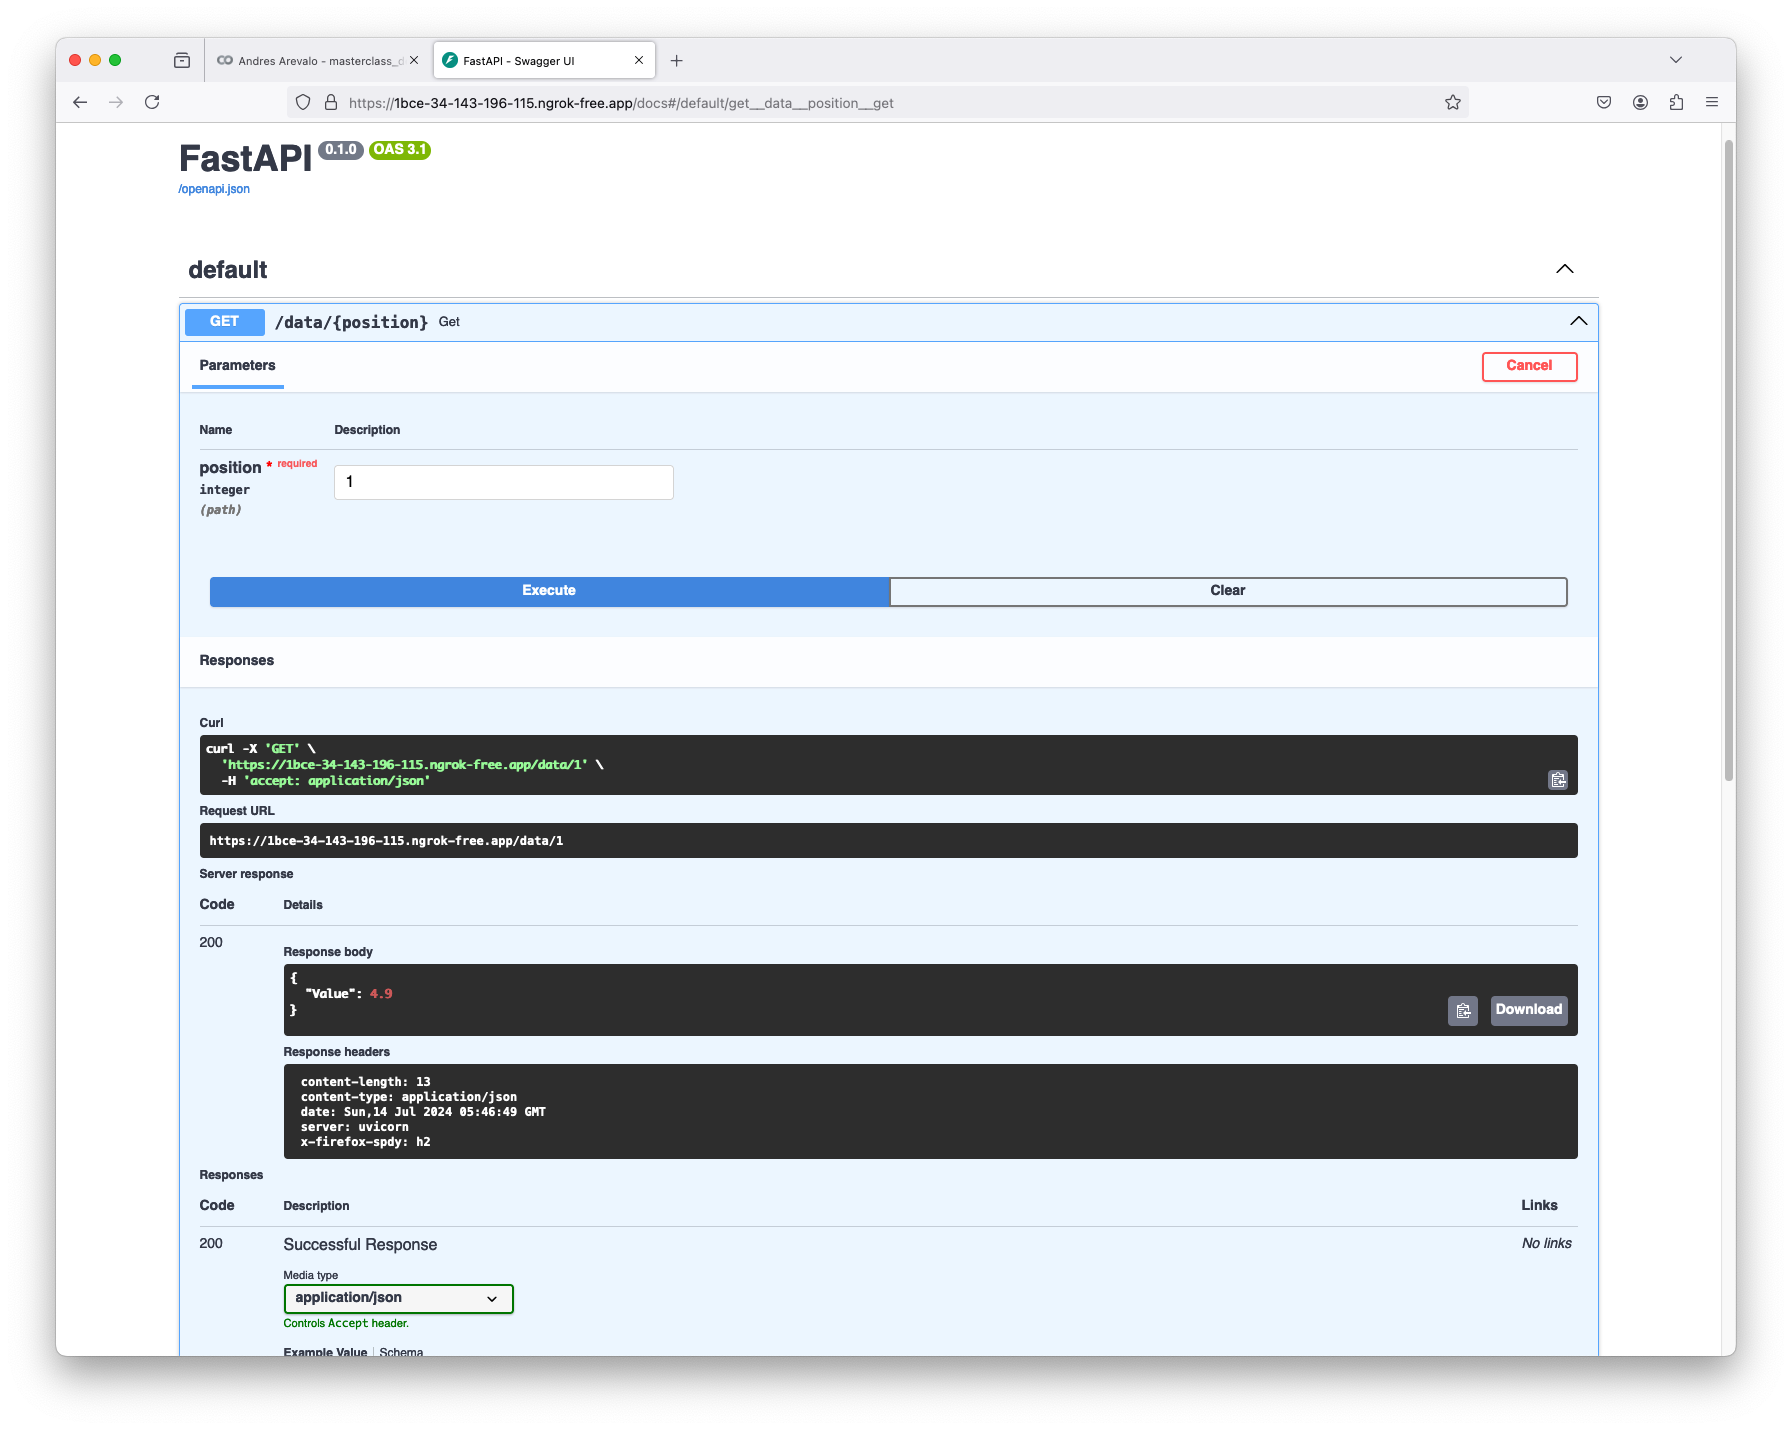

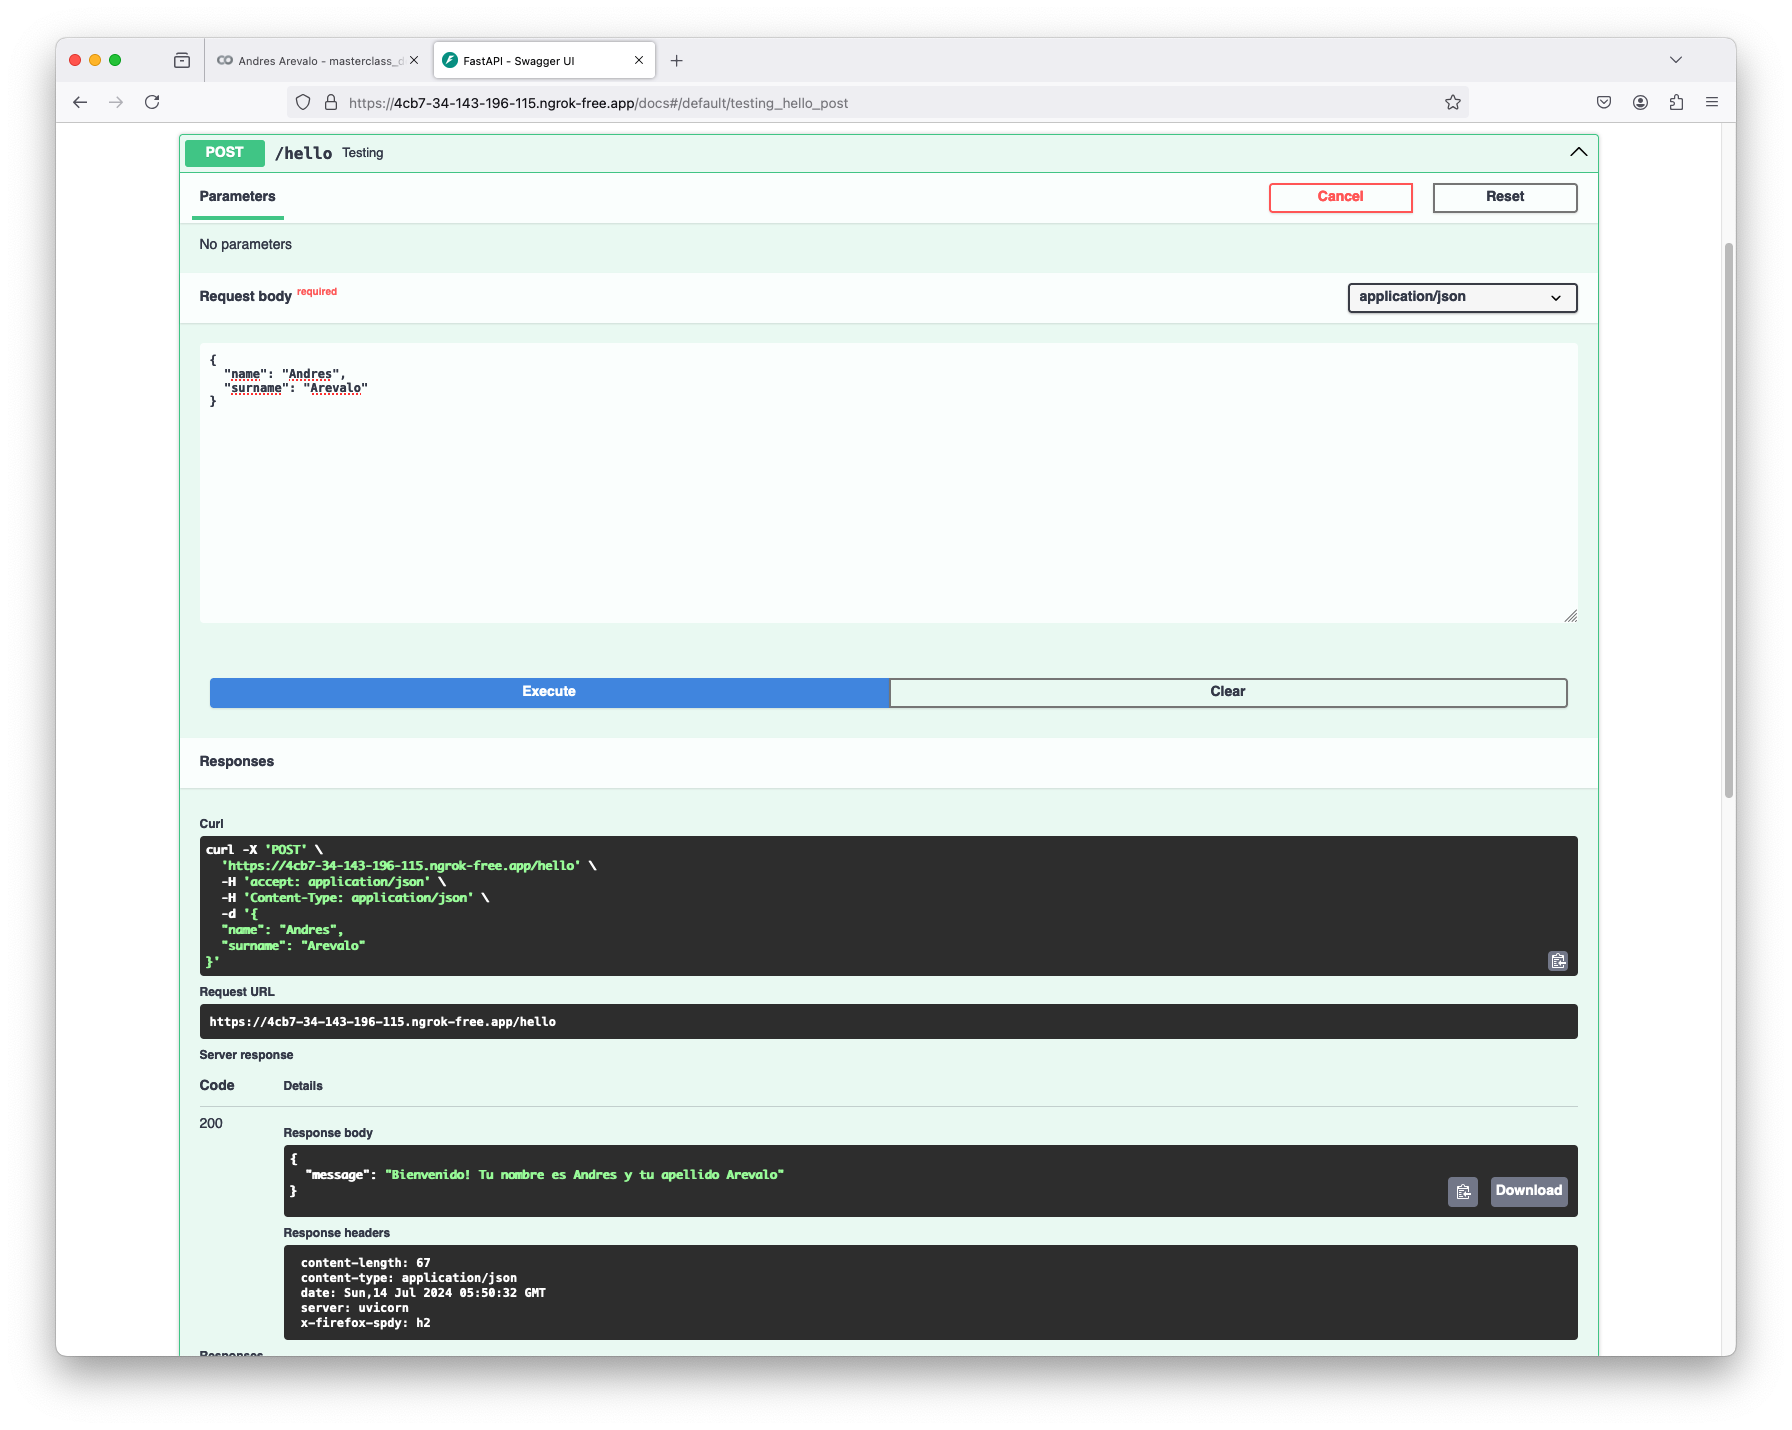

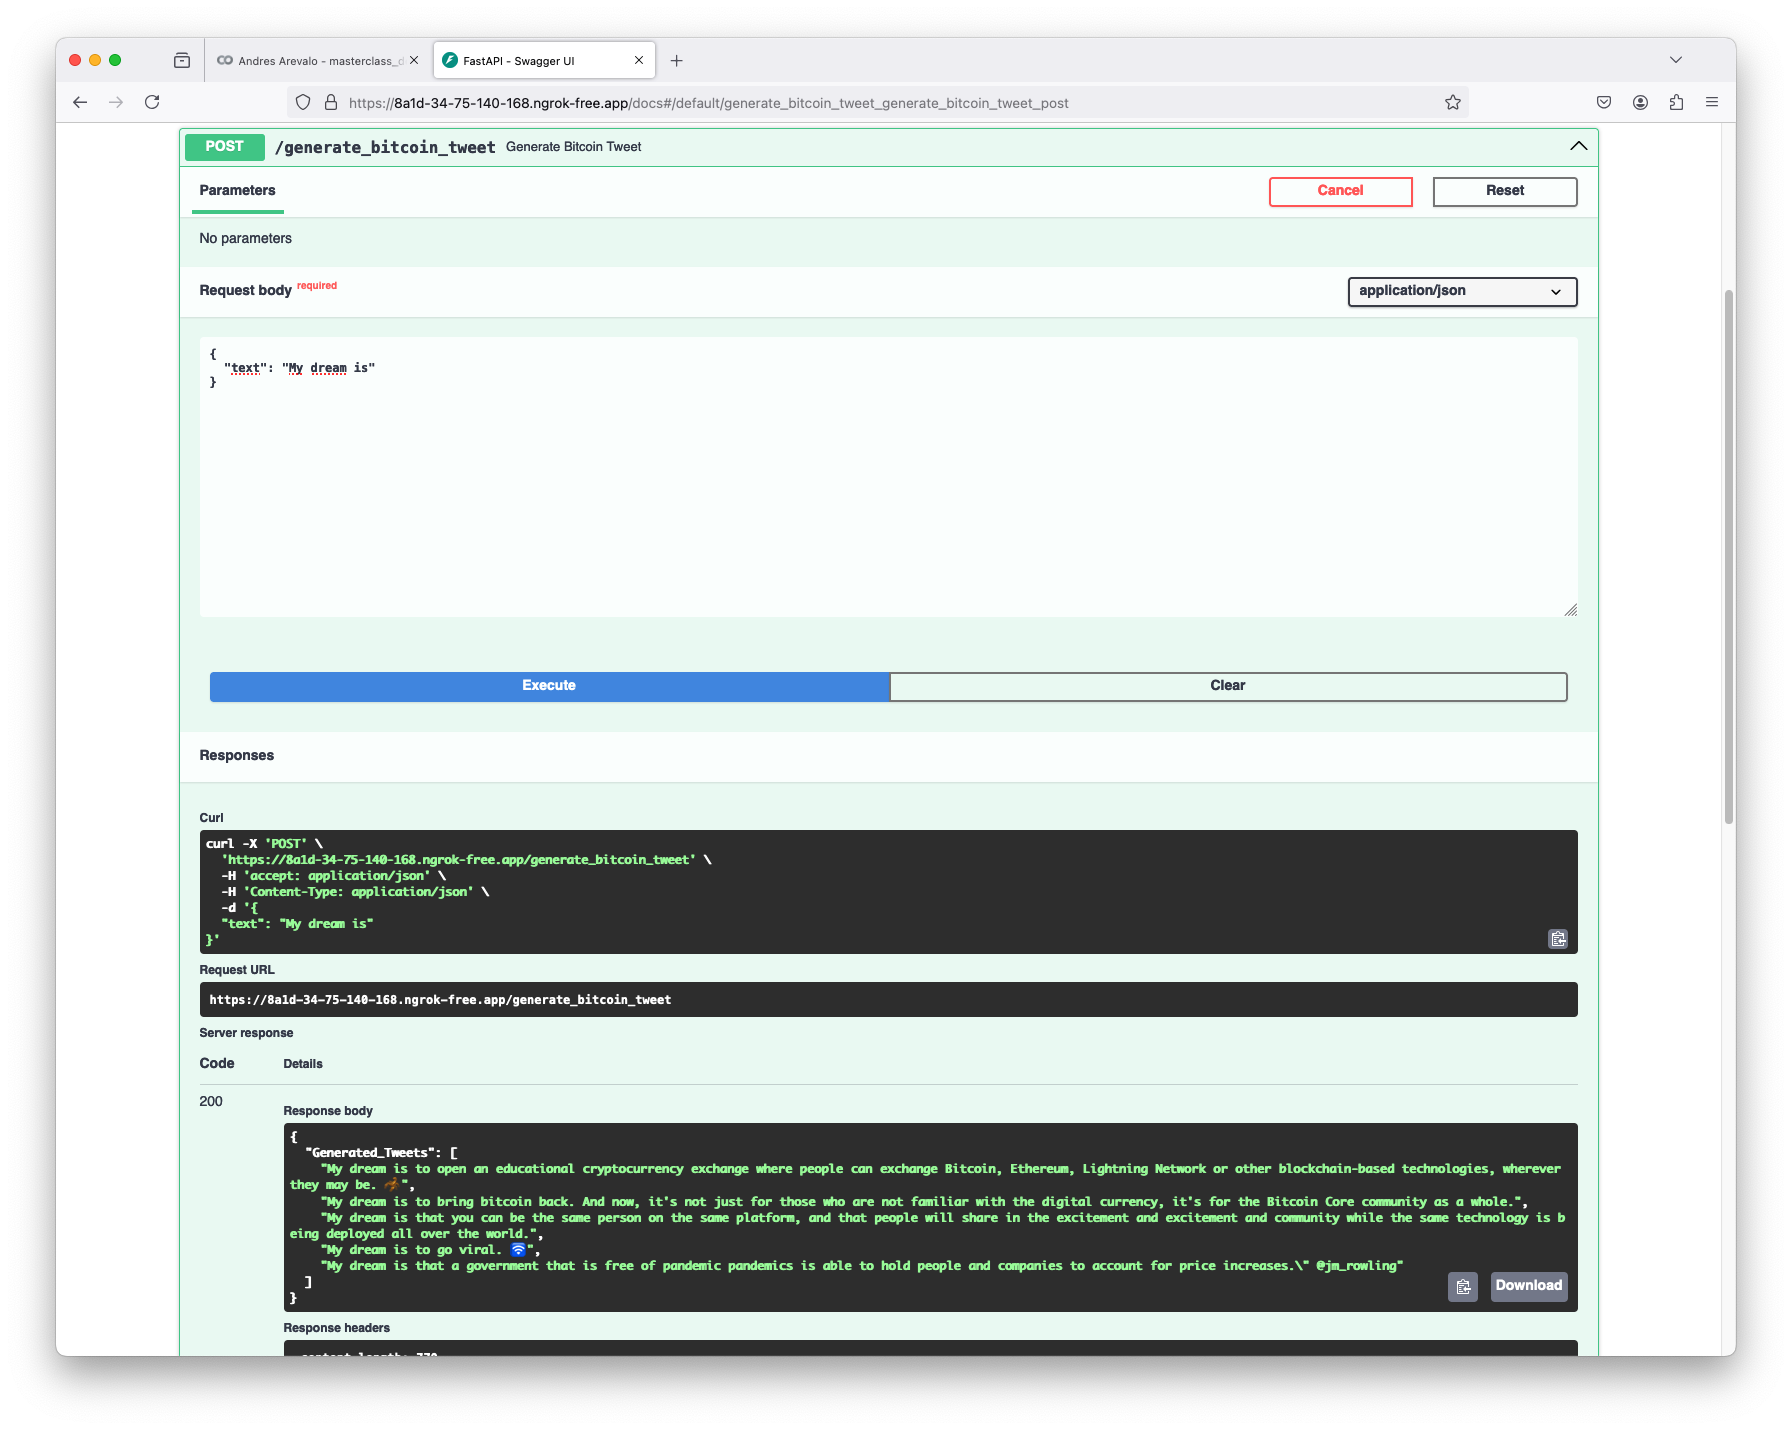

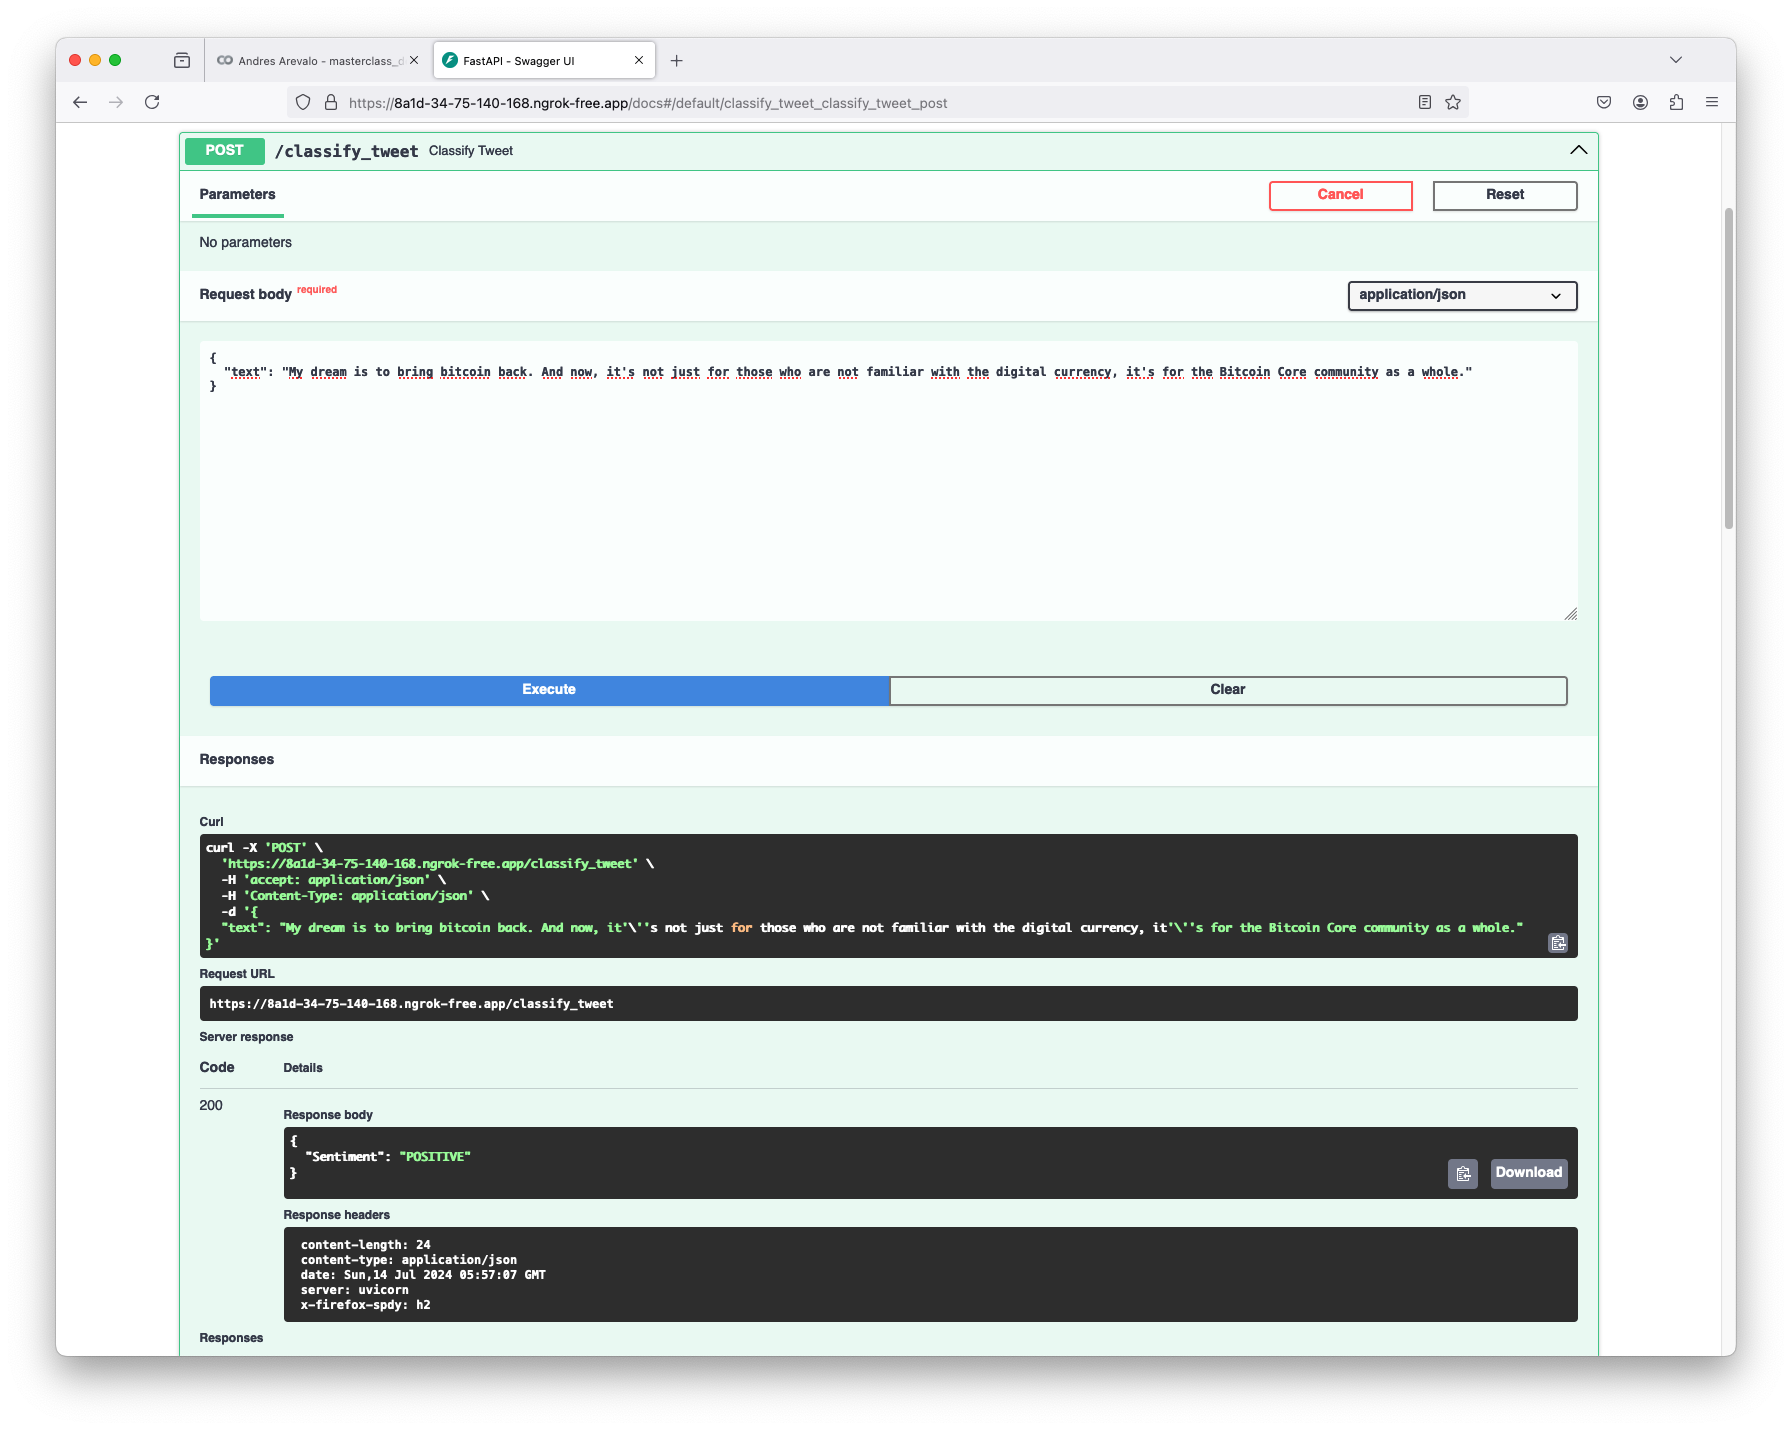

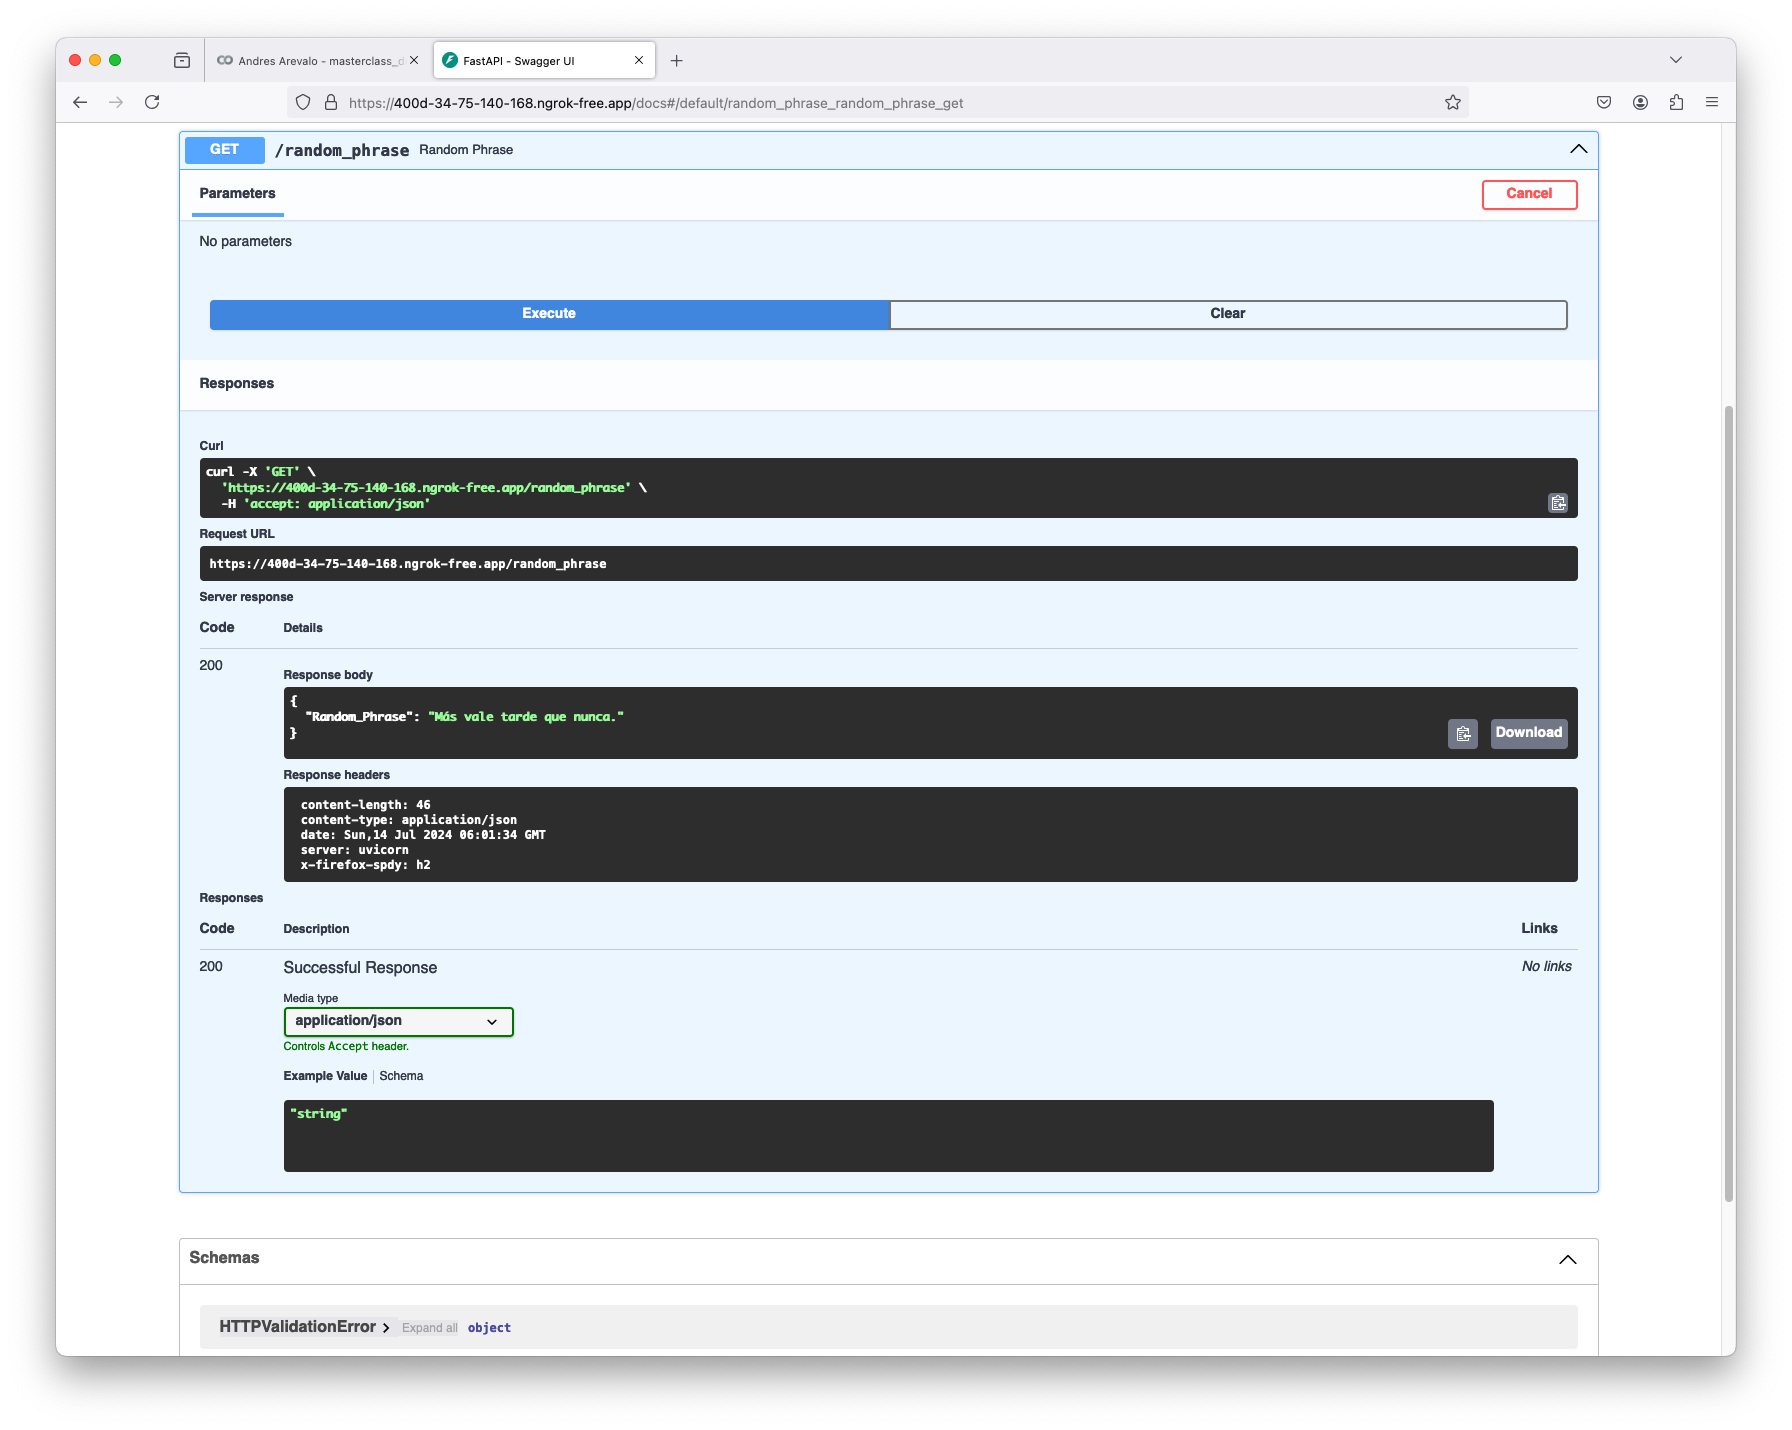

3. Captura de cada uno de los modulos en la llamada https.

In [ ]:
import requests

# Define the base URL of the FastAPI endpoint
base_url = "https://400d-34-75-140-168.ngrok-free.app"

# 1. Endpoint: /data/{position}
position = 2
response = requests.get(f"{base_url}/data/{position}")
if response.status_code == 200:
    print(f"/data/{position} Response:", response.json())
else:
    print(f"Error: {response.status_code}")

# 2. Endpoint: /hello
user_data = {
    "name": "John",
    "surname": "Doe"
}
response = requests.post(f"{base_url}/hello", json=user_data)
if response.status_code == 200:
    print("/hello Response:", response.json())
else:
    print(f"Error: {response.status_code}")

# 3. Endpoint: /classify_tweet
tweet_data = {
    "text": "Bitcoin is the future of finance!"
}
response = requests.post(f"{base_url}/classify_tweet", json=tweet_data)
if response.status_code == 200:
    print("/classify_tweet Response:", response.json())
else:
    print(f"Error: {response.status_code}")

# 4. Endpoint: /generate_bitcoin_tweet
initial_text = {
    "text": "The potential of Bitcoin is"
}
response = requests.post(f"{base_url}/generate_bitcoin_tweet", json=initial_text)
if response.status_code == 200:
    print("/generate_bitcoin_tweet Response:", response.json())
else:
    print(f"Error: {response.status_code}")

# 5. Endpoint: /random_phrase
response = requests.get(f"{base_url}/random_phrase")
if response.status_code == 200:
    print("/random_phrase Response:", response.json())
else:
    print(f"Error: {response.status_code}")


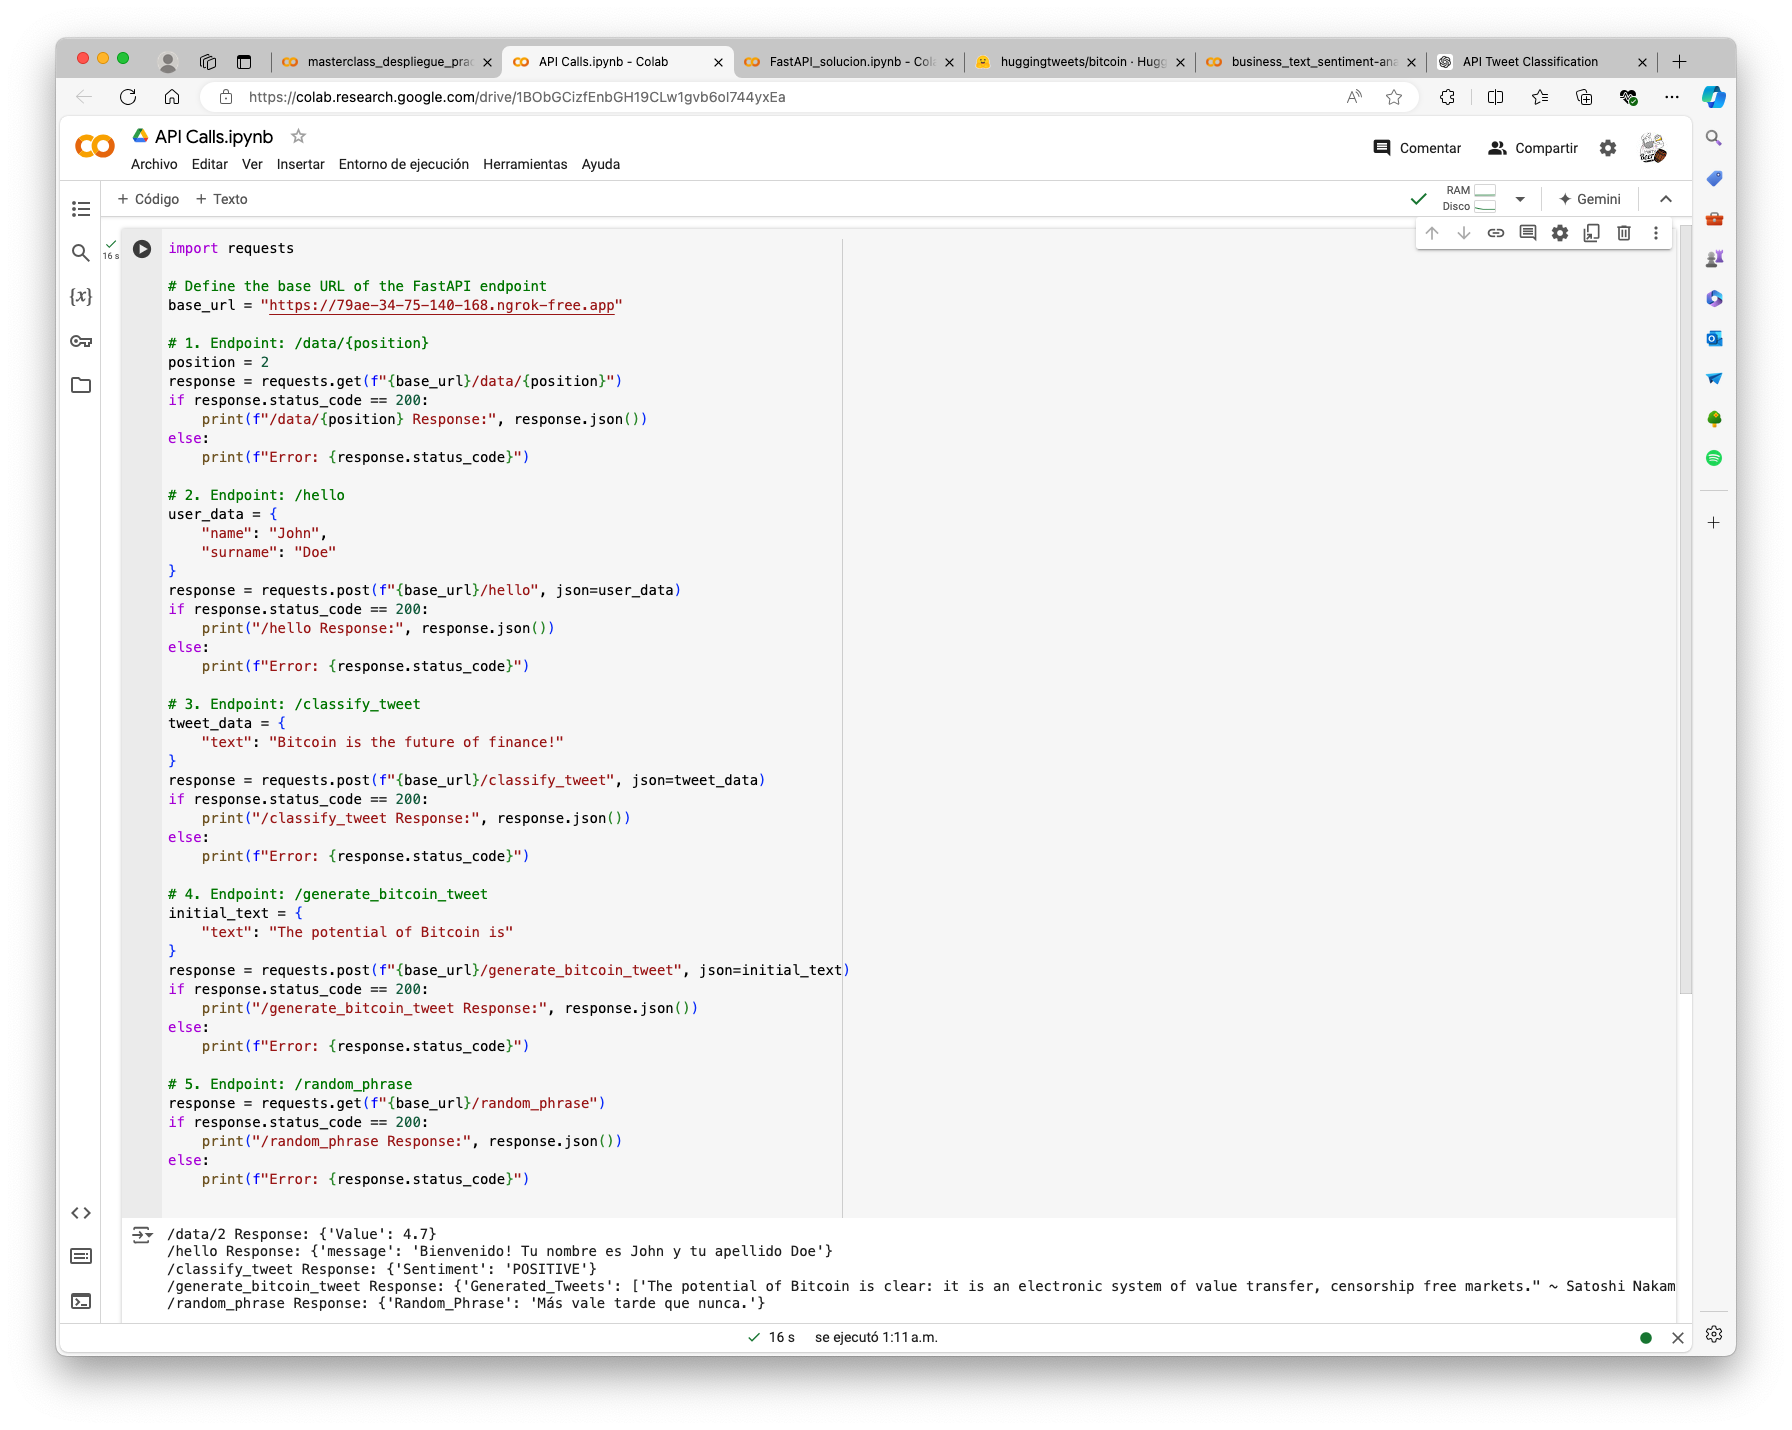